<font color='#5a9bd4'>**Proyecto Telecom X - Etapa 2 - Machine Learning**</font>
---

# <font color='#5a9bd4'>**Predicción de Evasión (Churn) de clientes.**</font>

## <font color='#b0b0b0'>**Índice**</font>

1. Descripción del protecto
2. Importación de librerías y configuraciones
3. Preprocesamiento de datos
4. Modelado de datos
   - Baseline Model - Decision Tree Classifier
   - Random Forest Classifier
   - Logistic Regression
   - K-Nearest Neighbors
   - XGBoost Classifier
5. Evaluación Best Models
   - Métricas Generales
   - Importancias y Coeficientes
6. Champion Model

# <font color='#5a9bd4'>**1. Descripción del proyecto**</font>

En este proyecto se desarrollarán modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación explorado en la etapa anterior, por lo que en el presente notebook se construirá un pipeline robusto para esta etapa inicial de modelado, en el cual se llevarán a cabo las siguientes tareas:


* Preparar los datos para el modelado (tratamiento, codificación, normalización).
* Realizar análisis de correlación y selección de variables.
* Entrenar diferentes modelos de clasificación, evaluar el rendimiento de estos a través de distintas métricas e interpretar los resultados de cada uno de ellos.
* Finalmente, se creará un reporte con una conclusión estratégica señalando los principales factores que influyen en la cancelación.

# <font color='#5a9bd4'>**2. Importación de librerías y configuraciones**</font>

## <font color='#ebac3a'>**Importación de librerías**</font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

import warnings
import requests
import pickle

from pathlib import Path

import imblearn
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## <font color='#ebac3a'>**Paths**</font>

In [2]:
PROJECT_PATH = 'C:/Users/Ignacio/JupyterScripts/ONE/challenge_telecomX_parte_2'

src = Path('src')
DATA_PATH = PROJECT_PATH / src

img = Path('img')
IMG_PATH = PROJECT_PATH / img

models = Path('models')
MODELS_PATH = PROJECT_PATH / models

reports = Path('reports')
REPORTS_PATH = PROJECT_PATH / reports

champion = Path('champion')
CHAMPION_PATH = PROJECT_PATH / champion

dirs = [DATA_PATH, IMG_PATH, MODELS_PATH, REPORTS_PATH, CHAMPION_PATH]


for directory in dirs:
    if not directory.exists():
        directory.mkdir(parents=True)
        print(f'Directoryo creado:\n{directory}\n')
    else:
        print(f'El directorio ya existe:\n{directory}\n')

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\ONE\challenge_telecomX_parte_2\src

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\ONE\challenge_telecomX_parte_2\img

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\ONE\challenge_telecomX_parte_2\models

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\ONE\challenge_telecomX_parte_2\reports

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\ONE\challenge_telecomX_parte_2\champion



## <font color='#ebac3a'>**Configuraciones**</font>

### Paleta de Colores del Proyecto

**Azules**  
<span style="display:inline-block; width:20px; height:20px; background:#4682b4; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#5a9bd4; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#2e6eab; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#1f4e79; margin-right:5px;"></span>

**Naranjas**  
<span style="display:inline-block; width:20px; height:20px; background:#e9611d; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#f07c3e; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#cc4e0f; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#a53d0c; margin-right:5px;"></span>

**Púrpuras**  
<span style="display:inline-block; width:20px; height:20px; background:#6a3fa0; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#8b5fc4; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#4f2d84; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#381c66; margin-right:5px;"></span>

**Cremas / Mostazas**  
<span style="display:inline-block; width:20px; height:20px; background:#ebac3a; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#d99a2e; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#c48824; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#b0771b; margin-right:5px;"></span>


**Grises**  
<span style="display:inline-block; width:20px; height:20px; background:#4d4d4d; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#7a7a7a; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#b0b0b0; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#dcdcdc; margin-right:5px;"></span>


In [3]:
# Estandarización de colores
sns.set_palette('colorblind')
churn_colors = ['#4682b4', '#e9611d']

In [4]:
# Colores del proyecto
AZUL_1, AZUL_2, AZUL_3, AZUL_4 = '#4682b4', '#5a9bd4', '#2e6eab', '#1f4e79'
NARANJA_1, NARANJA_2, NARANJA_3, NARANJA_4 = '#e9611d', '#f07c3e', '#cc4e0f', '#a53d0c'
PURPURA_1, PURPURA_2, PURPURA_3, PURPURA_4 = '#6a3fa0', '#8b5fc4', '#4f2d84', '#381c66'
CREMA_1, CREMA_2, CREMA_3, CREMA_4 = '#ebac3a', '#d99a2e', '#c48824', '#b0771b'
GRIS_1, GRIS_2, GRIS_3, GRIS_4 = '#4d4d4d', '#7a7a7a','#b0b0b0','#dcdcdc'

In [5]:
# Definir los colores personalizados
custom_colors = [
    '#4682b4', '#5a9bd4', '#2e6eab', '#1f4e79',  # Azules
    '#6a3fa0', '#8b5fc4', '#4f2d84', '#381c66',  # Púrpuras
    '#ebac3a', '#d99a2e', '#c48824', '#b0771b',  # Cremas
    '#e9611d', '#f07c3e', '#cc4e0f', '#a53d0c',  # Naranjas
]

# Creamos el colormap personalizado
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

## <font color='#ebac3a'>**Funciones**</font>

In [6]:
def metricas_generales(modelo, 
                       x_val: pd.core.frame.DataFrame,
                       y_val: pd.core.series.Series, 
                       nombre: str):
    """
    Funcion que calcula métricas de modelos clasificación
    ------------------------------------------------------------
    Parámetros:
        modelo:
            Modelo de Machine Learning Scikit-learn (debe contar con el método predict)
        x_val: pandas.core.frame.DataFrame
            DataFrame con las variables explicativas utilizadas para validar el modelo
        y_val: pandas.core.series.Series
            Pandas Series con las etiquetas reales de los datos utilizados para validar el modelo
        nombre: str
            Nombre que identificará el modelo para comparaciones
    ------------------------------------------------------------
    Returns:
        Diccionario con nombre del modelo y metricas: Accuracy, Precision, Recall, F1-score
    """
    
    metricas = {}
    y_pred = modelo.predict(x_val)
    metricas['Model'] = nombre
    metricas['Accuracy'] = np.round(accuracy_score(y_val, y_pred), 4)
    metricas['Precision'] = np.round(precision_score(y_val, y_pred), 4)
    metricas['Recall'] = np.round(recall_score(y_val, y_pred), 4)
    metricas['F1-score'] = np.round(f1_score(y_val, y_pred), 4)

    return metricas

In [7]:
def boxplot_churn(df: pd.DataFrame,
                  ycol: str,
                  ylabel: str=None,
                  title_translate: str=None):
    
    """    
    Genera y guarda un boxplot que muestra la distribución de una variable numérica 
    (`ycol`) según la condición de churn de los clientes.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos a graficar. Debe incluir las columnas 'Churn' y `ycol`.
    ycol : str
        Nombre de la columna numérica cuya distribución se desea visualizar.
    ylabel : str, opcional
        Etiqueta personalizada para el eje Y. Si no se especifica, se usa `ycol`.
    title_translate : str, opcional
        Nombre personalizado para mostrar en el título del gráfico. Si no se especifica, se usa `ycol`.
    --------------------------------------------------------------------------------------------------
    Guardado
    --------
    Guarda el gráfico como imagen PNG en la ruta `figures_path` con el nombre `boxplot_Churn_<ycol>.png`.
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig: matplotlib.figure.Figure
        Objeto de figura de Matplotlib con los gráficos generados.
    
    """

    if ylabel is None:
        ylabel = ycol
    if title_translate is None:
        title_translate = ycol
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    ax = sns.boxplot(data=df, x='Churn', y=ycol, hue='Churn', palette=churn_colors)
    plt.title(f'Distribución de {title_translate} según\nEvasión (Churn) de clientes', fontsize=18, pad=20)
    plt.xlabel('Churn', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(fontsize=13)
    plt.grid(True)
    
    fig.savefig(IMG_PATH/f'boxplot_Churn_{ycol}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')
    plt.show()
    return fig

In [8]:
def plot_conf_mat(model,
                  x: pd.core.frame.DataFrame, 
                  y: pd.core.series.Series, 
                  name: str,
                  save: str,
                  save_path: Path=IMG_PATH):

    """
    Función que grafíca la matriz de confusión de un modelo y guarda la figura en el Path indicado
    ----------------------------------------------------------------------------------------------
    Parámetros:
        model: Modelo sklearn
            Modelo de clasificación binaria que cuente con el método .predict()
        x: pandas.core.frame.DataFrame
            DataFrame con las variables explicativas
        y: pandas.core.series.Series
            Serie con el vector de etiquetas verdaderas (variable respuesta)
        name: str
            Nombre del modelo para el título de la figura
        save: str
            Nombre para guardar la figura como confmat_{nombre}.png
        save_path: Path
            Ruta donde debe guardarse la figura
    ---------------------------------------------------------------------------------------------
    Returns:
        Figura con matriz de confusion obtenida por el modelo seleccionado
    """
    
    
    y_pred = model.predict(x)
    confmat = confusion_matrix(y_true=y, y_pred=y_pred)

    confmat_plot = ConfusionMatrixDisplay(confmat, display_labels=['Retención', 'Evasión'])

    fig, ax = plt.subplots(figsize=(10,6))
    confmat_plot.plot(ax=ax, cmap=custom_cmap, colorbar=False, text_kw={'color': 'black', 'fontweight': 'bold'})

    plt.title(name, fontsize=18, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=16)
    plt.ylabel('True Label', fontsize=16)
    plt.tick_params(axis='both', labelsize=13)

    fig.savefig(save_path / f'confmat_{save}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')

In [9]:
def plot_analisis_variables(df: pd.core.frame.DataFrame, 
                            analisis: str,
                            nombre_modelo: str, 
                            save: str,
                            n_vars: int= None,
                            save_path: Path=IMG_PATH):
    """
    Funcion que permite visualizar Importancias o Coeficientes de modelos, guardando la figura en la ruta correspondiente.
    -----------------------------------------------------------------------------------
    Parámetros:
        df: pandas.core.frame.DataFrame
            DataFrame con las variables del modelo y sus importancias o coeficientes.
        analisis: str
            Acepta solo 'Importancia' o 'Coeficiente' para determinar qué analizar.
        nombre_modelo: str
            Nombre que aparecerá en el título del gráfico.
        save: str
            Nombre que se utilizará para guardar el gráfico con: "{analisis}_variables_{save}.png"
        n_vars: int
            Cantidad de variables que se desean analizar. Para análisis de coeficientes toma (n_vars / 2) para head y tail.
        save_path: Path
            Ruta para guardar el gráfico. Default IMG_PATH
    -----------------------------------------------------------------------------------
    Returns:
        Gráfico de barras horizontales con Importancia o Coeficientes de variables determinadas por modelo.
    """
    
    if analisis != 'Coeficiente' and analisis != 'Importancia':
        raise ValueError('Esta función acepta solo los valores "Importancia" o "Coeficiente" para el parámetro <analisis>') 
        
    if n_vars:
        if analisis == 'Coeficiente':
            n_vars = int(n_vars / 2)
            df1 = df.head(n_vars)
            df1
            df2 = df.tail(n_vars)
            df2
            df = pd.concat([df1, df2])
        else:
            df = df.head(n_vars)
        
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(data=df, x=analisis, y='Feature', orient='h', hue=analisis, palette=custom_cmap)
    plt.title(f'{analisis}s de Variables - {nombre_modelo}', fontsize=18, loc='left')
    plt.xlabel(analisis, fontsize=16)
    plt.ylabel('Feature', fontsize=16)

    if analisis == 'Coeficiente':
        x_max = df[analisis].max()
        x_min = df[analisis].min()
    
    for p in ax.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        if width != 0:
            if analisis == 'Coeficiente':                
                if width > 0:
                    ax.text(
                        (width + (x_max *0.3)), y,
                        f'{width:.4f}',
                        ha='right', va='center',
                        fontsize=9, color='black', fontweight='bold')
                else:
                    ax.text(
                        (width - (x_max *0.3)), y,
                        f'{width:.4f}',
                        ha='left', va='center',
                        fontsize=9, color='black', fontweight='bold')
            else:
                ax.text(
                    (width / 2), y,
                    f'{width*100:.2f}%',
                    ha='center', va='center',
                    fontsize=9, color='black', fontweight='bold'
                    )
        
    sns.despine()
    if analisis == 'Coeficiente':
        plt.xlim(x_min-1, x_max+1) 
    plt.tight_layout()

    fig.savefig(IMG_PATH / f'{analisis}_variables_{save}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')
    
    plt.show()

# <font color='#5a9bd4'>**3. Preprocesamiento de datos**</font>

Para el análisis, incluiré los registros que fueron clasificados como **outliers** en la etapa anterior en la cual se desarrolló la exploración y análisis de la base de datos, ya que en este caso representan comportamientos reales e importantes, como el de clientes con gasto acumulado muy alto que igual abandonan la empresa.

In [10]:
URL = 'https://raw.githubusercontent.com/ignaciomajo/proyecto_TelecomX/refs/heads/main/src/preprocessed_TelecomX_data.json'

datos = pd.read_json(URL)
datos.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal,Churn
0,0002-ORFBO,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30,No
1,0003-MKNFE,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40,No
2,0004-TLHLJ,Male,No,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85,Yes
3,0011-IGKFF,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85,Yes
4,0013-EXCHZ,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40,Yes


***Nota**: inicialmente, se eliminarán las varialbes `CustomerID` ya que esta no aporta poder predictivo debido a que es un simple identificador de cliente, y `ChargesDaily` ya que esta variable fue agregada simplemente al dividir `ChargesMonthly` en 30 días, lo cual resulta redundante y no aporta ningun valor agregado al análisis.*

In [11]:
try:
    URL = 'https://raw.githubusercontent.com/ignaciomajo/proyecto_TelecomX/refs/heads/main/src/clientes_altovalor_abandonan.json'
    outliers = pd.read_json(URL)
    # Concatenar ambos DafaFrame verticalmente
    datos = pd.concat([datos, outliers], axis=0)
    # Mezclar los datos ya que sino quedaran los outliers ubicados todos al final
    datos = datos.sample(frac=1, random_state=42).reset_index(drop=True)
except Exception as e:
    print('No se encontró el archivo correspondiente, o hubo un problema al cargar los datos')
    print(f'Error: {e}')

In [12]:
datos = datos.drop(['CustomerID', 'ChargesDaily'], axis=1)

In [13]:
datos.describe()

,Tenure,ChargesMonthly,ChargesTotal
count,7152.000000,7152.000000,7152.000000
mean,32.851370,65.361955,2346.648399
std,24.684639,30.258020,2314.453371
min,0.000000,18.250000,0.000000
25%,9.000000,36.250000,410.837500
50%,30.000000,70.700000,1424.450000
75%,56.000000,90.400000,3949.575000
max,72.000000,118.750000,8684.800000


In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7152 entries, 0 to 7151
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7152 non-null   object 
 1   SeniorCitizen     7152 non-null   object 
 2   Partner           7152 non-null   object 
 3   Dependents        7152 non-null   object 
 4   Tenure            7152 non-null   int64  
 5   PhoneService      7152 non-null   object 
 6   MultipleLines     7152 non-null   object 
 7   InternetService   7152 non-null   object 
 8   OnlineSecurity    7152 non-null   object 
 9   OnlineBackup      7152 non-null   object 
 10  DeviceProtection  7152 non-null   object 
 11  TechSupport       7152 non-null   object 
 12  StreamingTV       7152 non-null   object 
 13  StreamingMovies   7152 non-null   object 
 14  Contract          7152 non-null   object 
 15  PaperlessBilling  7152 non-null   object 
 16  PaymentMethod     7152 non-null   object 


## <font color='#ebac3a'>**Encoding de variables categóricas**</font>

In [15]:
datos.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'ChargesMonthly', 'ChargesTotal', 'Churn'],
      dtype='object')

In [16]:
X = datos.drop('Churn', axis=1)
y = datos['Churn']

In [17]:
X_linear = X.copy()
y_linear = y.copy()

In [18]:
categoricas = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [19]:
one_hot = make_column_transformer(
                    (OneHotEncoder(drop='if_binary'), categoricas),
                    remainder='passthrough',
                    sparse_threshold=0,
                    force_int_remainder_cols=False
)

one_hot_linear = make_column_transformer(
                    (OneHotEncoder(drop='first'), categoricas),
                    remainder='passthrough',
                    sparse_threshold=0,
                    force_int_remainder_cols=False
)

label_encoder = LabelEncoder()

In [20]:
X = one_hot.fit_transform(X)
y = label_encoder.fit_transform(y)

In [21]:
X_linear = one_hot_linear.fit_transform(X_linear)
y_linear = label_encoder.fit_transform(y_linear)

In [22]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
columnas = one_hot.get_feature_names_out()

columnas_encoded = []
for columna in columnas:
    columna = columna.split('__')[1]
    columnas_encoded.append(columna)

In [24]:
df = pd.DataFrame(X, columns=columnas_encoded)
df

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesMonthly,ChargesTotal
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,19.80,19.80
1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,60.05,3994.05
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,60.0,99.80,5985.75
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,35.10,101.10
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,63.0,79.85,4861.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,46.0,19.95,907.05
7148,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.15,19.15
7149,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,23.90,97.50
7150,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.55,19.55


In [25]:
columnas = one_hot_linear.get_feature_names_out()

columnas_encoded = []
for columna in columnas:
    columna = columna.split('__')[1]
    columnas_encoded.append(columna)

In [26]:
df_linear = pd.DataFrame(X_linear, columns=columnas_encoded)
df_linear

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesMonthly,ChargesTotal
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,19.80,19.80
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67.0,60.05,3994.05
2,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,60.0,99.80,5985.75
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,35.10,101.10
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,63.0,79.85,4861.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,46.0,19.95,907.05
7148,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.15,19.15
7149,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,23.90,97.50
7150,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.55,19.55


In [27]:
df_y = pd.DataFrame(y, columns=['Churn'])

In [28]:
df = pd.concat([df, df_y], axis=1)
df.head()

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesMonthly,ChargesTotal,Churn
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,19.80,19.80,0
1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.0,60.05,3994.05,0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,60.0,99.80,5985.75,0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,35.10,101.10,0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,63.0,79.85,4861.45,0


In [29]:
df_y_linear = pd.DataFrame(y_linear, columns=['Churn'])

In [30]:
df_linear = pd.concat([df_linear, df_y_linear], axis=1)
df_linear.head()

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesMonthly,ChargesTotal,Churn
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,19.80,19.80,0
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,67.0,60.05,3994.05,0
2,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,60.0,99.80,5985.75,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,35.10,101.10,0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,63.0,79.85,4861.45,0


### **Nota:**
Se puede observar que la única columna en la cual `1 = No` es `InternetService`. Esto puede resultar confuso debido a quel el resto de variables tienen formato `1 = Yes`, por lo que, para mantener la consistencia semántica del análisis, transformaré el nombre de esta columna de:

`InternetService_No` -> `NoInternetService`


Otro posible acercamiento sería mantener solo las columnas `InternetService_DSL` e `InternetService_Fiberoptic`, ya que la ausencia de ambas, es decir, ambas con **valor = 0** indicaría la presencia de `InternetService_No`. Pero inicialmente mantendré todas las columnas hasta generar y evaluar el modelo base.

In [31]:
df.rename(columns={'InternetService_No': 'NoInternetService'}, inplace=True)
df_linear.rename(columns={'InternetService_No': 'NoInternetService'}, inplace=True)
df.sample(10)

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,NoInternetService,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesMonthly,ChargesTotal,Churn
6603,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,71.0,19.45,1378.45,0
2932,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.0,51.75,201.10,1
3862,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,19.50,19.50,0
165,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,69.50,69.50,1
1443,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,35.25,35.25,1
2230,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,53.0,25.55,1336.10,0
1344,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,69.0,106.50,7348.80,1
5221,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,71.0,111.30,7985.90,0
2919,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,25.0,54.20,1423.15,0
5524,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,68.0,114.70,7849.85,0


## <font color='#ebac3a'>**Balance del Dataset**</font>

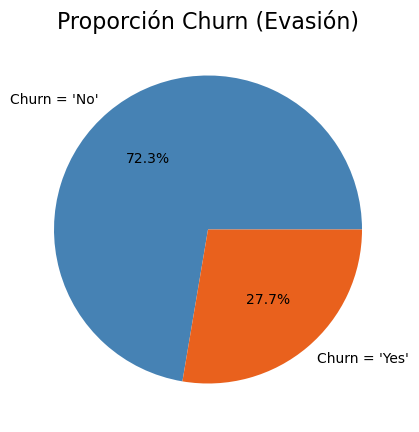

In [32]:
# Visualizar la proporción de registros en relación a la evasión (Churn)
churns = df.groupby('Churn')['Churn'].value_counts()
churns = pd.DataFrame(churns)
fig, ax = plt.subplots(figsize=(6,5))
ax = plt.pie(data=churns,
             x=churns['count'],
             labels=["Churn = 'No'", "Churn = 'Yes'"],
             autopct='%1.1f%%',
             colors=churn_colors)

plt.title('Proporción Churn (Evasión)', fontsize=16)

fig.savefig(IMG_PATH/'pie_Churn_proportion.png',
            transparent=False,
            dpi=300,
            bbox_inches='tight')
plt.show()

### <font color='#8b5fc4'>**Observaciones: Balance del Dataset**</font>

Como puede verse en el gráfico, la proporción de las clases está desbalanceada, con aproximadamente 3/4 de los datos correspondiente a clientes que no han abandonado la empresa. Por lo tanto, para que el modelo pueda generalizar correctamente el patrón presente en los datos, será necesario reducir la cantidad de registros para equiparar las observaciones de cada clase.

In [33]:
columnas = df.columns
columnas, len(columnas)

(Index(['Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
        'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL',
        'InternetService_Fiber optic', 'NoInternetService',
        'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
        'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
        'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
        'PaymentMethod_Credit card (automatic)',
        'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
        'Tenure', 'ChargesMonthly', 'ChargesTotal', 'Churn'],
       dtype='object'),
 27)

In [34]:
undersampler = NearMiss(version=3)

X_balanced, y_balanced = undersampler.fit_resample(X,y)

In [35]:
columnas_linear = df_linear.columns

In [36]:
X_linear_balanced, y_linear_balanced = undersampler.fit_resample(X_linear,y_linear)

In [37]:
X_balanced.shape, y_balanced.shape, X_linear_balanced.shape, y_linear_balanced.shape

((3956, 26), (3956,), (3956, 23), (3956,))

In [38]:
df1 = pd.DataFrame(X_balanced, columns=columnas[:-1])
df2 = pd.DataFrame(y_balanced, columns=[columnas[-1]])
df = pd.concat([df1, df2], axis=1)
df

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,NoInternetService,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesMonthly,ChargesTotal,Churn
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,72.0,116.95,8594.40,0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,72.0,117.50,8670.10,0
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,72.0,118.75,8672.45,0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,72.0,110.30,7966.90,0
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,72.0,110.60,7962.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,16.0,72.65,1194.30,1
3952,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,19.60,35.85,1
3953,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,24.0,76.10,1712.70,1
3954,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,15.0,101.10,1504.05,1


In [39]:
df1 = pd.DataFrame(X_linear_balanced, columns=columnas_linear[:-1])
df2 = pd.DataFrame(y_linear_balanced, columns=[columnas_linear[-1]])
df_linear = pd.concat([df1, df2], axis=1)
df_linear

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,NoInternetService,OnlineSecurity_Yes,OnlineBackup_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesMonthly,ChargesTotal,Churn
0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,72.0,116.95,8594.40,0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,72.0,117.50,8670.10,0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,72.0,118.75,8672.45,0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,72.0,110.30,7966.90,0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,72.0,110.60,7962.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,16.0,72.65,1194.30,1
3952,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.0,19.60,35.85,1
3953,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,24.0,76.10,1712.70,1
3954,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,15.0,101.10,1504.05,1


In [40]:
df.describe()

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,NoInternetService,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesMonthly,ChargesTotal,Churn
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,...,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000
mean,0.505056,0.215369,0.427199,0.233822,0.915066,0.469161,0.301062,0.627149,0.071790,0.251011,...,0.096562,0.691608,0.180485,0.173660,0.460819,0.185035,25.162032,74.844843,2126.464130,0.500000
std,0.500038,0.411130,0.494734,0.423314,0.278819,0.499111,0.458777,0.483624,0.258172,0.433650,...,0.295398,0.461888,0.384640,0.378865,0.498525,0.388375,21.994213,25.315958,2192.434299,0.500063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.800000,18.850000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,56.037500,305.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,79.875000,1238.150000,0.500000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,42.000000,94.850000,3307.450000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000


In [41]:
df_linear.describe()

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,NoInternetService,OnlineSecurity_Yes,OnlineBackup_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesMonthly,ChargesTotal,Churn
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,...,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000
mean,0.504297,0.215116,0.427705,0.234328,0.915066,0.469161,0.626643,0.072548,0.251011,0.358190,...,0.172396,0.096815,0.691608,0.174166,0.460566,0.184530,25.147877,74.808898,2125.045349,0.500000
std,0.500045,0.410955,0.494808,0.423631,0.278819,0.499111,0.483757,0.259426,0.433650,0.479529,...,0.377772,0.295743,0.461888,0.379300,0.498506,0.387965,21.994382,25.351237,2192.625976,0.500063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.800000,18.850000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,55.950000,305.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.000000,79.850000,1236.725000,0.500000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,42.000000,94.850000,3304.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000


## <font color='#ebac3a'>**Normalización de datos**</font>

Si bien algunos modelos como `Random Forest` no necesitan normalización (ya que este no se basa en distancias, sino en preguntas de comparación: < o > ), se analizarán las variables numéricas, ya que la idea del proyecto es probar distintos modelos y evaluarlos para así seleccionar el que tenga mejor desempeño para ponerlo en producción.

In [42]:
def bin_width(df, columna):
    n = df.shape[0]
    iqr = df[columna].quantile(0.75) - df[columna].quantile(0.25) 
    
    bin_width = 2 * (iqr / np.cbrt(n))
    return bin_width

<Axes: xlabel='Tenure', ylabel='Count'>

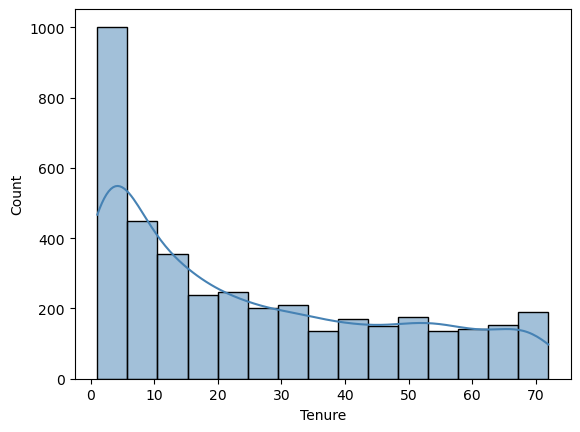

In [43]:
BIN_WIDTH = bin_width(df, 'Tenure')

sns.histplot(df['Tenure'], binwidth=BIN_WIDTH, color=churn_colors[0], kde=True)

<Axes: xlabel='ChargesMonthly', ylabel='Count'>

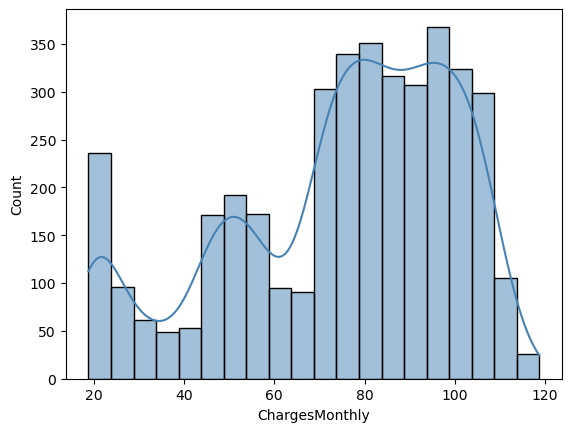

In [44]:
BIN_WIDTH = bin_width(df, 'ChargesMonthly')

sns.histplot(df['ChargesMonthly'], binwidth=BIN_WIDTH, color=churn_colors[0], kde=True)

<Axes: xlabel='ChargesTotal', ylabel='Count'>

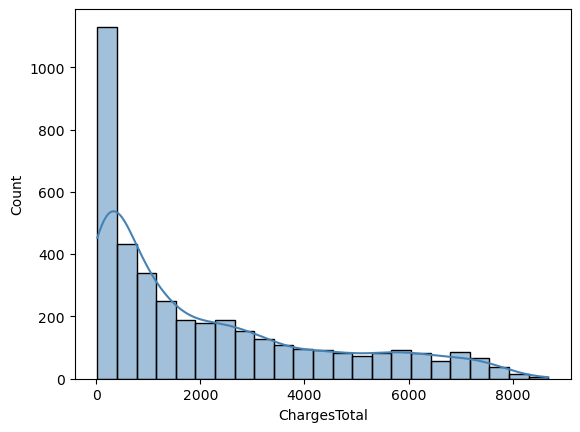

In [45]:
BIN_WIDTH = bin_width(df, 'ChargesTotal')

sns.histplot(df['ChargesTotal'], binwidth=BIN_WIDTH, color=churn_colors[0], kde=True)

In [46]:
df['log_ChargesTotal'] = np.log(df['ChargesTotal'] + 1)

<Axes: xlabel='log_ChargesTotal', ylabel='Count'>

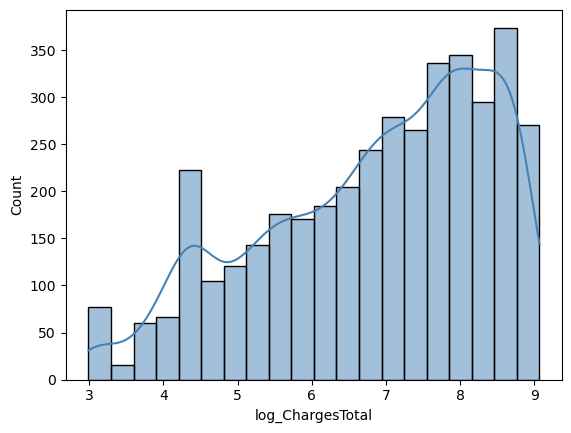

In [47]:
BIN_WIDTH = bin_width(df, 'log_ChargesTotal')

sns.histplot(df['log_ChargesTotal'], binwidth=BIN_WIDTH, color=churn_colors[0], kde=True)

In [48]:
df['sqrt_ChargesTotal'] = np.sqrt(df['ChargesTotal'] + 1)

<Axes: xlabel='sqrt_ChargesTotal', ylabel='Count'>

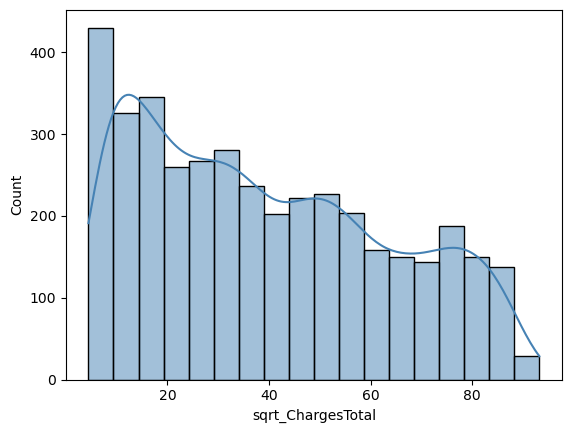

In [49]:
BIN_WIDTH = bin_width(df, 'sqrt_ChargesTotal')

sns.histplot(df['sqrt_ChargesTotal'], binwidth=BIN_WIDTH, color=churn_colors[0], kde=True)

In [50]:
scaler = StandardScaler()

In [51]:
df['Z_ChargesTotal'] = scaler.fit_transform(df[['ChargesTotal']])

<Axes: xlabel='Z_ChargesTotal', ylabel='Count'>

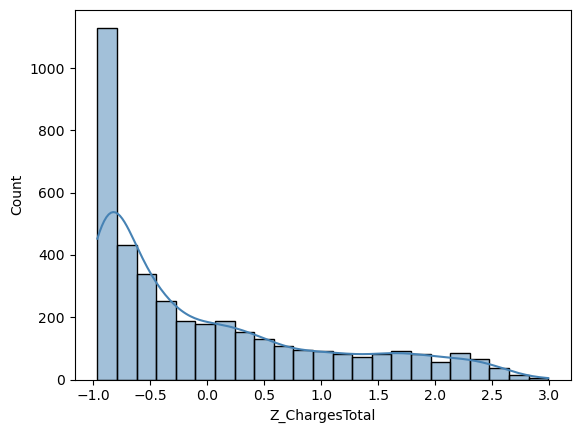

In [52]:
BIN_WIDTH = bin_width(df, 'Z_ChargesTotal')

sns.histplot(df['Z_ChargesTotal'], binwidth=BIN_WIDTH, color=churn_colors[0], kde=True)

### <font color='#8b5fc4'>**Observaciones: Normalización de datos**</font>

Es posible observar que ninguna de las transformaciones aplicadas consigue corregir la asimetría positiva de ChargesTotal.
Debido a su naturaleza acumulativa, se puede esperar de este tipo de variables que la mayor concentración de observaciones se encuentre en valores pequeños, teniendo solo valores altos por ejemplo, para un grupo seleccionado de clientes.
En adición, fueron incluidos los registros considerados outliers (clientes de alto valor que abandonaron la empresa), ya que resulta importante conocer que características comparten estos con aquellos de "menor valor", lo que indicará **áreas críticas de mejora para reducir la tasa de Evación *(Churn)***.

Por lo tanto optaré por mantener las variables cuantitativas en su estado original y evaluar si los modelos son capaces de manejarlas correctamente. Caso contrario, aplicaré `MinMaxScaler`

In [53]:
df = df.drop(['log_ChargesTotal', 'sqrt_ChargesTotal', 'Z_ChargesTotal'], axis=1)

In [54]:
#normalizer = MinMaxScaler()

#df['Tenure'] = normalizer.fit_transform(df[['Tenure']])
#df['ChargesMonthly'] = normalizer.fit_transform(df[['ChargesMonthly']])
#df['ChargesTotal'] = normalizer.fit_transform(df[['ChargesTotal']])

In [55]:
df.describe()

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,NoInternetService,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesMonthly,ChargesTotal,Churn
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,...,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000
mean,0.505056,0.215369,0.427199,0.233822,0.915066,0.469161,0.301062,0.627149,0.071790,0.251011,...,0.096562,0.691608,0.180485,0.173660,0.460819,0.185035,25.162032,74.844843,2126.464130,0.500000
std,0.500038,0.411130,0.494734,0.423314,0.278819,0.499111,0.458777,0.483624,0.258172,0.433650,...,0.295398,0.461888,0.384640,0.378865,0.498525,0.388375,21.994213,25.315958,2192.434299,0.500063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.800000,18.850000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,56.037500,305.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,79.875000,1238.150000,0.500000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,42.000000,94.850000,3307.450000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000


In [56]:
df.shape

(3956, 27)

## <font color='#ebac3a'>**Correlación entre variables**</font>

In [57]:
corr = df.corr()

In [58]:
# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

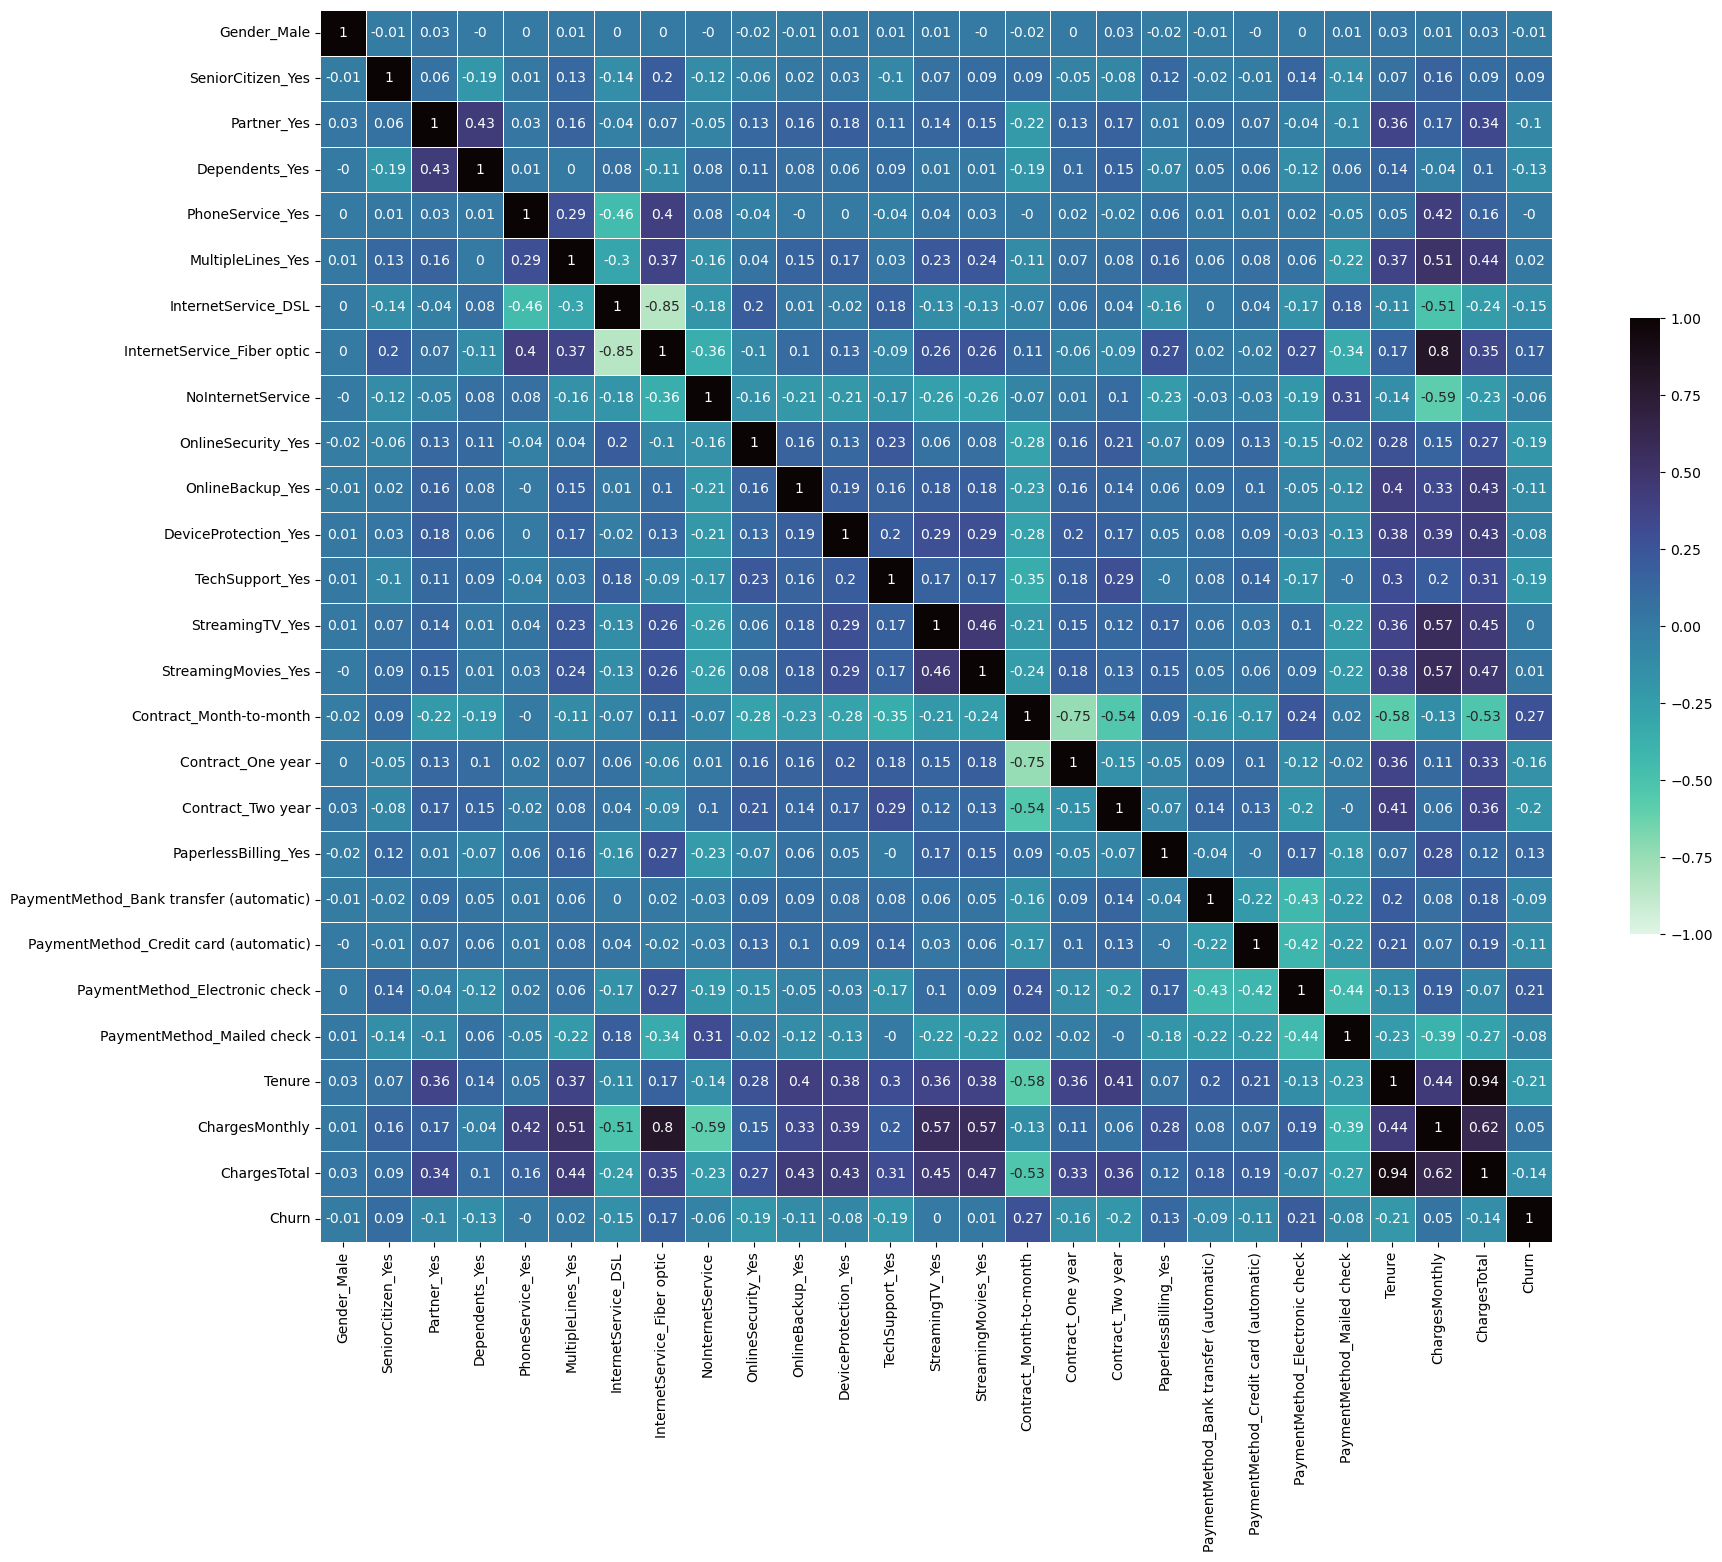

In [59]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5}, cmap='mako_r')
plt.show()

### ***Nota:***

Debido a que existe una cantidad considerable de variables, para una mejor visualización selecionaré aquellas que tiene una correlación absoluta con la Evasión mayor a 0.07

In [60]:
cols = corr.loc['Churn'].abs()[corr.loc['Churn'].abs() > 0.07].index
corr_selected = corr[cols].loc[cols]  # Subset del DataFrame completo

In [61]:
# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr_selected, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

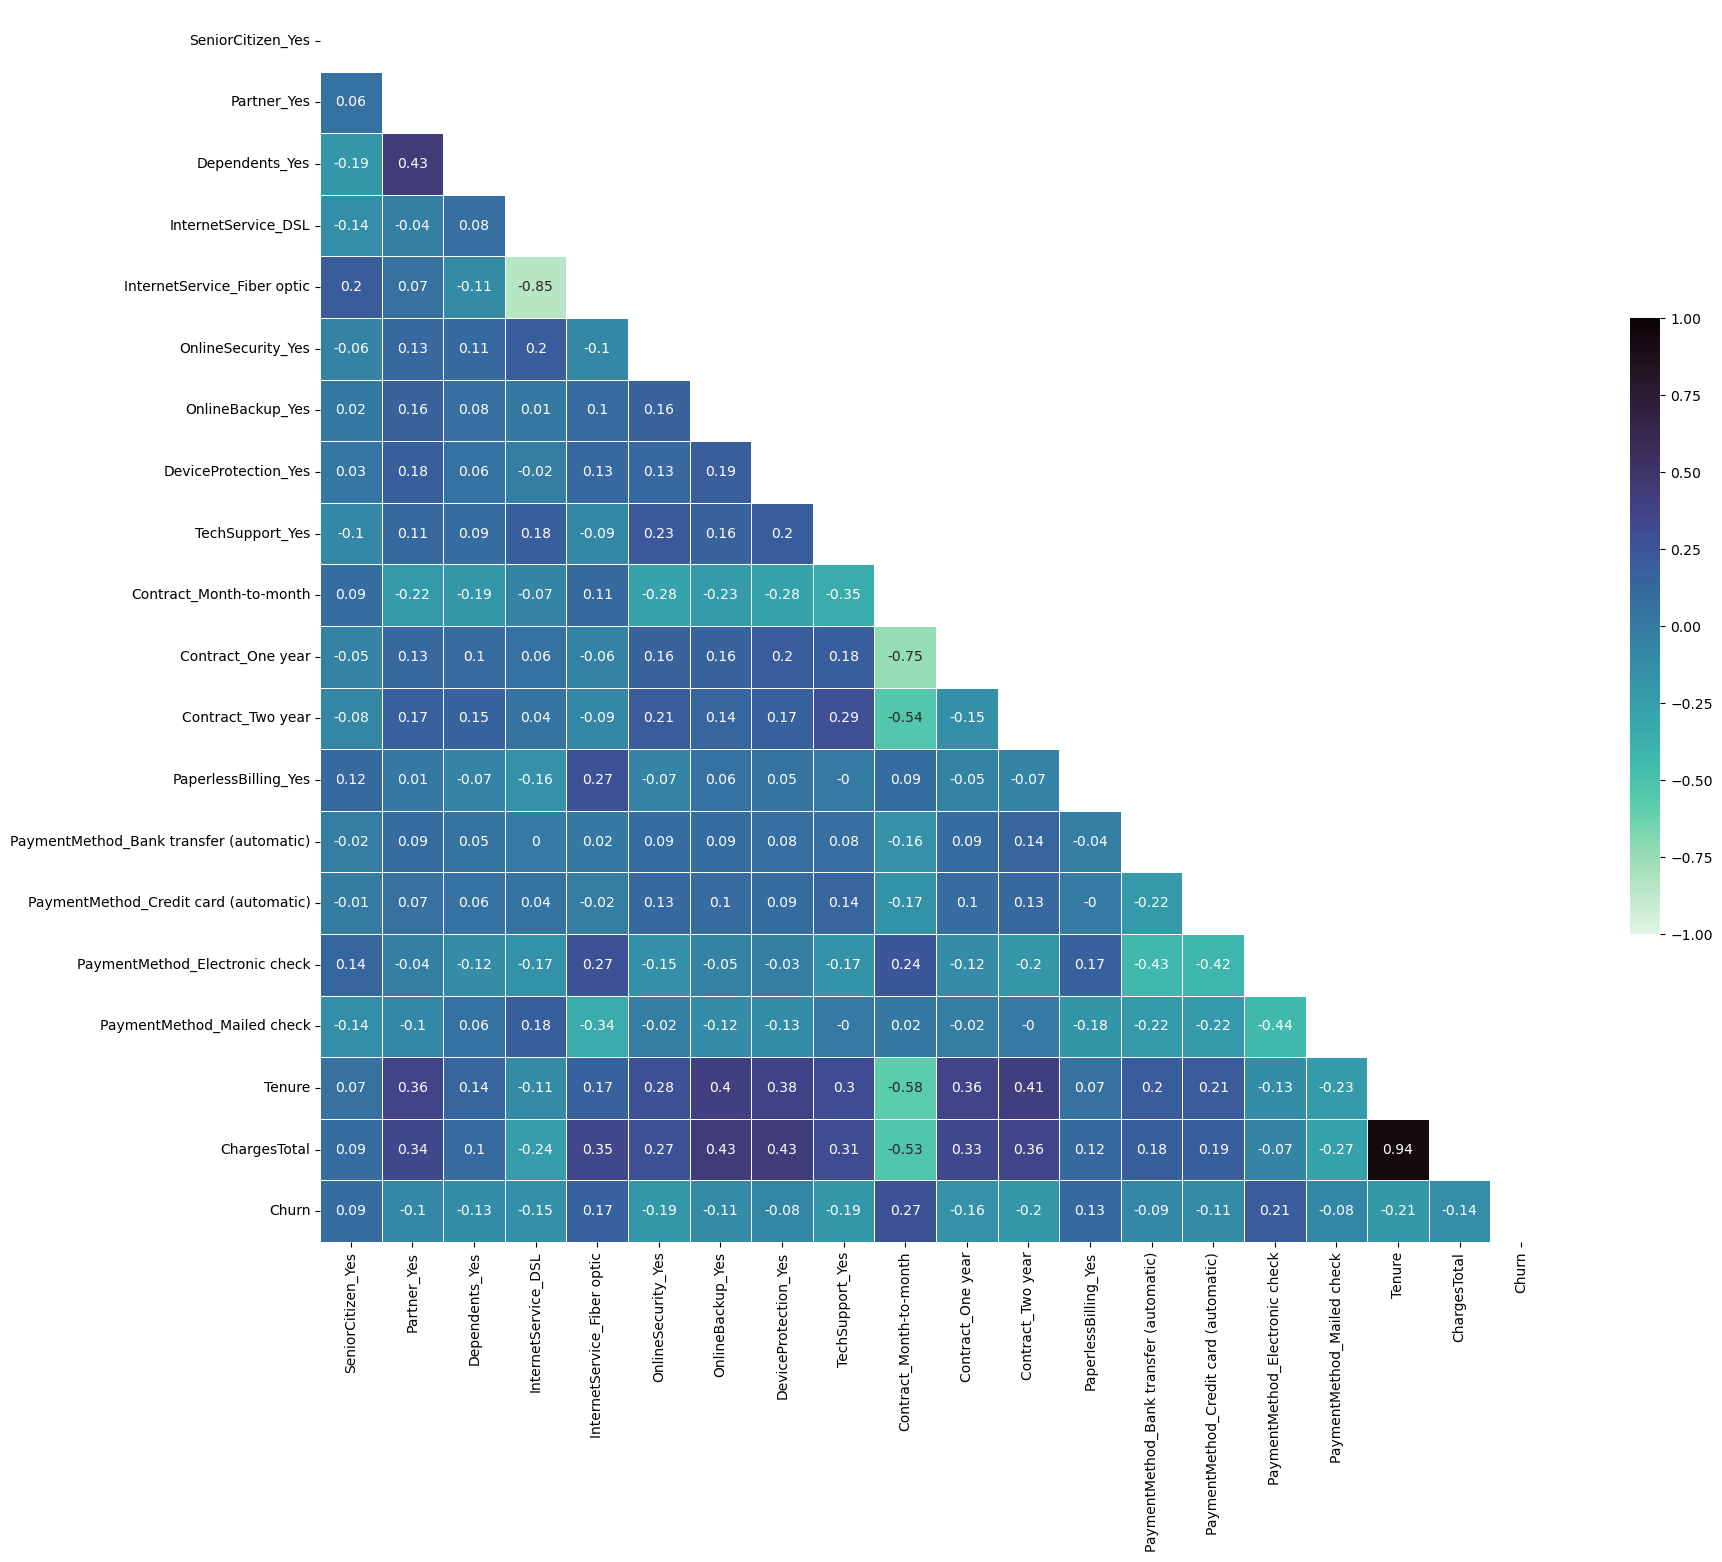

In [62]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr_selected, 2), mask=mascara, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5}, cmap='mako_r')
plt.show()

### <font color='#8b5fc4'>**Observaciones: Correlación entre variables**</font>

Particularmente destaca una fuerte relación positiva entre `ChargesTotal` y `Tenure`. Esto probablemente se debe a la naturaleza acumulativa de `ChargesTotal`, por lo que, es posible que esta variable sea ya explicada entre `Tenure` y ChargesMonthly. Para verificar este fenómeno, se llevará a cabo un análisis de colinealidad, a través de **Variance Inflation Factor**.

## <font color='#ebac3a'>**Análisis de multicolinealidad**</font>

### <font color='#f07c3e'>**VIF 1**</font>

Variance Inflation Factor, en esencia, realiza una regresión lineal tomando cada variable explicativa como variable respuesta, y busca explicarla a través del resto de variables explicativas. Los valores aceptables suelen ser:

* 1 < VIF < 5 = **Aceptable**
* 5 < VIF < 10 = **La variable puede conservarse si se considera necesario**
* 10 < VIF = **Existe colinealidad fuerte entre dicha variable y alguna de las otras variables explicativas**

En los casos que exista colinealidad, la eliminación de dichas variables se descarta para no perjudicar al modelo.

Se utilizará la variable X_linear que fue codificada con `OneHotEncoder(drop='first')`, esto asegura que se descarte la primera categoría de cada feature al codificar las variables, evitando que se introduzca multicolinealidad manualmente al modelo.

Además, se escalarán las variables numéricas ya que dicho algoritmo, al realizar regresiones lineales, es sensible a la escala de los datos.

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import RobustScaler

In [64]:
robust_scaler = RobustScaler()

In [65]:
x_num = ['Tenure', 'ChargesMonthly', 'ChargesTotal']

X_linear_num = df_linear[x_num]

X_linear_num = robust_scaler.fit_transform(X_linear_num)

df_linear[['Tenure_scaled', 'ChargesMonthly_scaled', 'ChargesTotal_scaled']] = X_linear_num

df_linear = df_linear.drop(['Tenure', 'ChargesMonthly', 'ChargesTotal'], axis=1)

In [66]:
X_vif = df_linear.drop('Churn', axis=1)

In [67]:
features = X_vif.columns

In [68]:
df_vif = pd.DataFrame()
df_vif['Feature'] = features
df_vif['VIF'] = [vif(X_vif[features], i) for i in range(len(features))]

X

In [69]:
df_vif.sort_values('VIF', ascending=False)

,Feature,VIF
22,ChargesTotal_scaled,21.714752
20,Tenure_scaled,16.386025
4,PhoneService_Yes,10.885451
6,InternetService_Fiber optic,8.163215
21,ChargesMonthly_scaled,6.151511
18,PaymentMethod_Electronic check,3.899794
16,PaperlessBilling_Yes,3.700671
13,StreamingMovies_Yes,2.855964
12,StreamingTV_Yes,2.839825
5,MultipleLines_Yes,2.729499


### <font color='#8b5fc4'>**Observaciones: VIF 1**</font>

Como se observó en el **Análisis de Correlación** de variables, `ChargesTotal` y `Tenure` son las variables que presentan mayor valor de **VIF**, la primera superando el umbral crítico por más del doble.

|Feature	            |VIF      |
|-----------------------|---------|
|ChargesTotal_scaled	|21.714752|
|Tenure_scaled	        |16.386025|

Como se mencionó anteriormente, ChargesTotal es la acumulación de `ChargesMonthly` a lo largo de la cantidad de meses de `Tenure`. Por lo tanto, se descartará la primera para evaluar el resultado de **Variance Inflation Factor**.

### <font color='#f07c3e'>**VIF 2**</font>

In [70]:
X_vif = df_linear.copy()

In [71]:
X_vif = X_vif.drop(['ChargesTotal_scaled', 'Churn'], axis=1)

In [72]:
features = X_vif.columns
features

Index(['Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'NoInternetService', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure_scaled', 'ChargesMonthly_scaled'],
      dtype='object')

In [73]:
df_vif_2 = pd.DataFrame()
df_vif_2['Feature'] = features
df_vif_2['VIF'] = [vif(X_vif[features], i) for i in range(len(features))]

In [74]:
df_vif_2.sort_values('VIF', ascending=False)

,Feature,VIF
4,PhoneService_Yes,10.879814
6,InternetService_Fiber optic,8.097099
21,ChargesMonthly_scaled,5.225418
18,PaymentMethod_Electronic check,3.899444
16,PaperlessBilling_Yes,3.700407
13,StreamingMovies_Yes,2.846206
12,StreamingTV_Yes,2.831976
20,Tenure_scaled,2.780794
5,MultipleLines_Yes,2.720184
2,Partner_Yes,2.479575


### <font color='#8b5fc4'>**Observaciones: VIF 2**</font>

Como se observa en la tabla anterior, al eliminar la variable con mayor VIF (`ChargesTotal_scaled`), el puntaje de VIF de `Tenure_scaled` descendió de **16.386 a 2.780**. Esto representa una evidencia empírica de que `ChargesTotal_scaled` estaba fuertemente explicada por las otras dos variables numéricas (`Tenure_scaled` y `ChargesMonthly_scaled`), lo que confirma una fuerte colinealidad entre ellas.

Los **modelos lineales**, como `LogisticRegression` (a menos que se use **regularización Lasso**, que penaliza la complejidad del modelo), `LinearRegression`, o `SVM` con `kernel='linear'`, **son sensibles a la multicolinealidad**, ya que esta distorsiona la interpretación de los coeficientes y puede inflar su varianza.

Por el contrario, **modelos no lineales** como `RandomForest`, `XGBoost` o `KNN`, **son mucho más robustos** frente a este fenómeno, e incluso pueden beneficiarse de contar con variables redundantes, ya que su arquitectura puede determinar cuáles resultan más útiles para la clasificación sin sufrir distorsión en los parámetros.

Por esta razón, **se conservarán todas las variables** para los modelos no lineales, y se aplicarán los **tratamientos adecuados** (como la eliminación de variables con VIF elevado o la regularización) **únicamente en los modelos lineales**, con el objetivo de maximizar la interpretabilidad y estabilidad de los mismos.

## <font color='#ebac3a'>**Análisis Dirigido**</font>

### <font color='#f07c3e'>**Evasión (Churn) según Antigüedad (Tenure)**</font>

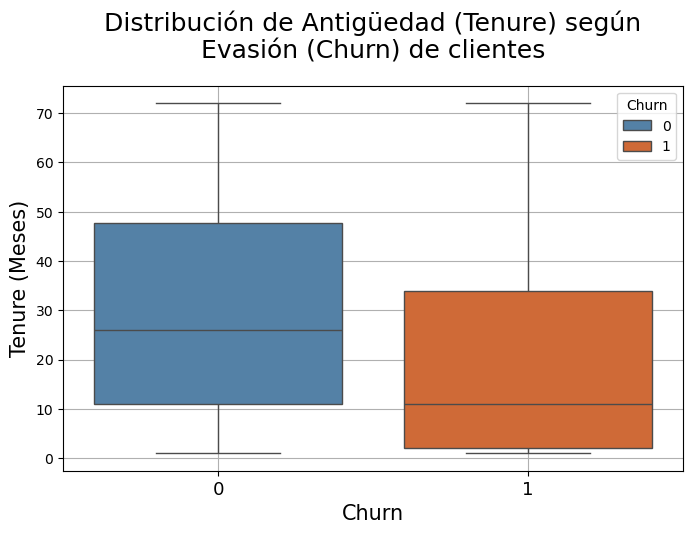

In [75]:
tenure_boxplot = boxplot_churn(df, ycol='Tenure', ylabel='Tenure (Meses)', title_translate='Antigüedad (Tenure)')

In [76]:
df[df['Churn'] == 1].describe()['Tenure']

count    1978.000000
mean       20.508595
std        21.721863
min         1.000000
25%         2.000000
50%        11.000000
75%        34.000000
max        72.000000
Name: Tenure, dtype: float64

### <font color='#8b5fc4'>**Observaciones: Evasión (Churn) según Antigüedad (Tenure)**</font>

Como se pudo observar en la etapa anterior del proyecto, es posible observar la frecuencia de abandono es mayor en las etapas tempranas de la relación del cliente con la empresa, con una **concentración del 50% de abandono** antes del primer año de contrato.

### <font color='#f07c3e'>**Evasión (Churn) según Gasto Total (ChargesTotal)**</font>

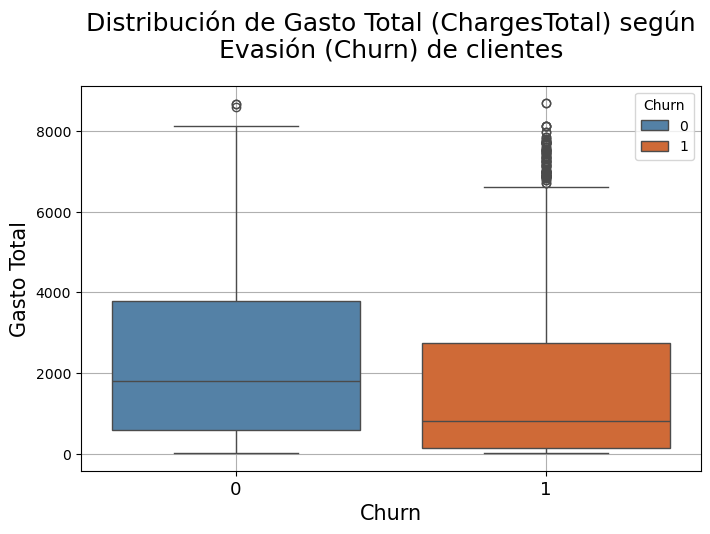

In [77]:
tenure_boxplot = boxplot_churn(df, ycol='ChargesTotal', ylabel='Gasto Total', title_translate='Gasto Total (ChargesTotal)')

### <font color='#8b5fc4'>**Observaciones: Evasión (Churn) según Gasto Total (ChargesTotal)**</font>

Debido a que ChargesTotal es una variable de naturaleza acumulativa, esta fuertemente relacionada con la antigüedad del cliente. Esto se puede observar en el análisis de correlación donde en índice de Pearson entre ambas variables es **0.94**. Esto puede generar redundancia en el modelo, por lo que, se experimentará primero considerando ambas variables, y luego se mantendrá Tenure y ChargesMonthly, ya que la combinación de estas dos variables explican ChargesTotal.

# <font color='#5a9bd4'>**4. Modelado de datos**</font>

In [78]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [79]:
X, X_test, y, y_test = tts(X, y, test_size=0.1, stratify=y, random_state=42)

In [80]:
X_train, X_val, y_train, y_val = tts(X, y, test_size=0.135, stratify=y, random_state=42)

In [81]:
X_linear = df_linear.drop('Churn', axis=1)
y_linear = df_linear['Churn']

In [82]:
X_linear.shape, y_linear.shape

((3956, 23), (3956,))

In [83]:
X_linear, X_linear_test, y_linear, y_linear_test = tts(X_linear, y_linear, test_size=0.1, stratify=y_linear, random_state=42)

In [84]:
X_linear_train, X_linear_val, y_linear_train, y_linear_val = tts(X_linear, y_linear, test_size=0.135, stratify=y_linear, random_state=42)

## <font color='#ebac3a'>**Baseline model - Decision Tree Classifier**</font>

In [85]:
X.shape

(3560, 26)

In [86]:
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

In [87]:
baseline_model = DecisionTreeClassifier(random_state=42)

In [88]:
baseline_results = cross_validate(baseline_model, X, y, cv=kf)
baseline_results

{'fit_time': array([0.04084015, 0.03867722, 0.03630519, 0.04025698, 0.0385325 ,
        0.03740978]),
 'score_time': array([0.00419521, 0.00475979, 0.00447917, 0.00443196, 0.00421953,
        0.00271845]),
 'test_score': array([0.66329966, 0.64646465, 0.64080944, 0.61551433, 0.60202361,
        0.65935919])}

In [89]:
baseline_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [90]:
baseline_pred = baseline_model.predict(X_val)

In [91]:
print(classification_report(y_val, baseline_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       241
           1       0.64      0.64      0.64       240

    accuracy                           0.64       481
   macro avg       0.64      0.64      0.64       481
weighted avg       0.64      0.64      0.64       481



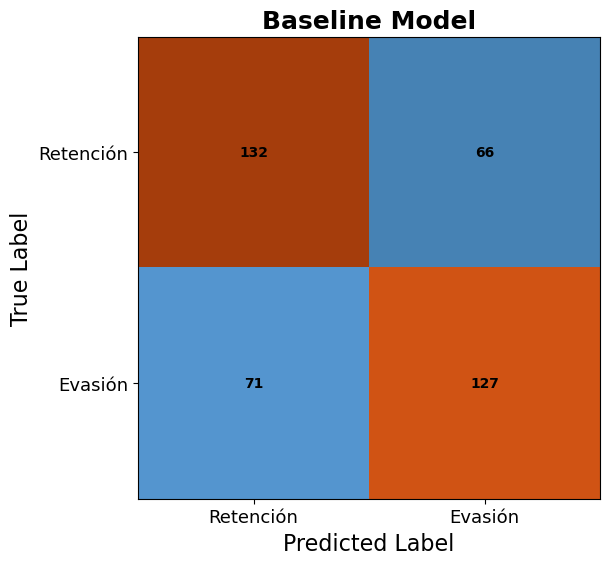

In [92]:
plot_conf_mat(baseline_model, X_test, y_test, 'Baseline Model', 'baseline')

In [93]:
# Crear una lista para almacenar los resultados de los modelos y poder realizar comparaciones.
results_tracking = []

In [94]:
baseline_results = metricas_generales(baseline_model, X_val, y_val, 'Baseline Model')

In [95]:
baseline_results

{'Model': 'Baseline Model',
 'Accuracy': 0.6424,
 'Precision': 0.6417,
 'Recall': 0.6417,
 'F1-score': 0.6417}

## <font color='#ebac3a'>**Conclusiones: Baseline Model**</font>

El **modelo base** fue entrenado sin ajuste de hiperparámetros ni técnicas de preprocesamiento avanzadas, con el objetivo de servir como punto de comparación para modelos posteriores.

| Modelo         | Accuracy  |Precision | Recall    | F1-score | 
|----------------|-----------|----------|-----------|----------|
| Baseline Model | 64.24%    |64.17%    | 64.17%    |64.17%    |

* **Exactitud (Accuracy)** del modelo:
  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

* **Recall (Sensibilidad):** el modelo es capaz de identificar correctamente al **64.17%** de los clientes que efectivamente abandonan:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

* **Precisión (Precision):** el **64.17%** de las veces que el modelo predice que un cliente abandonará, está en lo correcto:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

* **F1-score:** dado que la precisión y la sensibilidad tienen el mismo valor, el F1-score también es **64.17%**:

$$
\text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

**Objetivo**: A partir de este modelo base, se buscará **mejorar principalmente la sensibilidad (Recall)** —clave para detectar clientes en riesgo de abandono—, sin sacrificar excesivamente la precisión, de manera de evitar intervenciones innecesarias sobre clientes que continuarían utilizando el servicio.

In [96]:
results_tracking.append(baseline_results)

In [97]:
# Para comprobar el ajuste del entrenamiento del modelo base:
train_preds = baseline_model.predict(X_train)
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1539
           1       1.00      1.00      1.00      1540

    accuracy                           1.00      3079
   macro avg       1.00      1.00      1.00      3079
weighted avg       1.00      1.00      1.00      3079



Es posible ver que el modelo memorizó el patrón en los datos de entrenamiento, devolviendo 100% en todas las métricas. Sin embargo, al generalizar en datos de validación, alcanzo aproximadamente 65% de Exactitud.

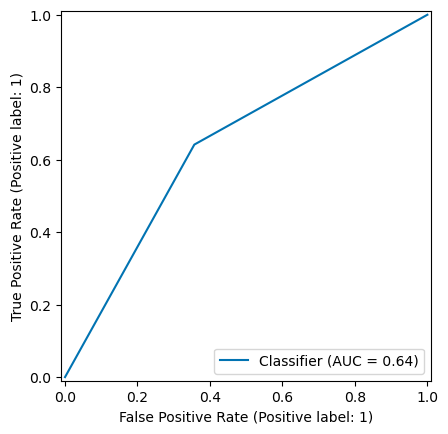

In [98]:
RocCurveDisplay.from_predictions(y_val, baseline_pred);

In [99]:
baseline_model.feature_importances_

array([2.09542961e-02, 2.00098129e-02, 1.93618724e-02, 1.31445750e-02,
       8.97967478e-03, 2.22393135e-02, 1.97798837e-04, 2.56367803e-02,
       0.00000000e+00, 3.07704879e-02, 1.31258425e-02, 2.43051421e-02,
       2.39615991e-02, 1.46129733e-02, 1.16773213e-02, 4.84556981e-02,
       6.14058128e-03, 2.58103628e-03, 1.64746220e-02, 1.11323793e-02,
       1.08579255e-02, 2.56765878e-02, 1.29282475e-02, 2.07799682e-01,
       2.12845497e-01, 1.96130253e-01])

In [100]:
baseline_imporatences = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.round(baseline_model.feature_importances_, 4)}).sort_values('Importance', ascending=False)
baseline_imporatences

,Feature,Importance
24,ChargesMonthly,0.2128
23,Tenure,0.2078
25,ChargesTotal,0.1961
15,Contract_Month-to-month,0.0485
9,OnlineSecurity_Yes,0.0308
21,PaymentMethod_Electronic check,0.0257
7,InternetService_Fiber optic,0.0256
11,DeviceProtection_Yes,0.0243
12,TechSupport_Yes,0.0240
5,MultipleLines_Yes,0.0222


## <font color='#ebac3a'>**Random Forest Classifier**</font>

### <font color='#f07c3e'>**RandomForest 1 - MaxDepth = 10**</font>

In [101]:
rf_1 = RandomForestClassifier(max_depth=10, random_state=42) 

In [102]:
rf_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [103]:
rf_1_preds = rf_1.predict(X_val)
print(classification_report(y_val, rf_1_preds))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       241
           1       0.71      0.73      0.72       240

    accuracy                           0.71       481
   macro avg       0.71      0.71      0.71       481
weighted avg       0.71      0.71      0.71       481



In [104]:
rf_1_results = metricas_generales(rf_1, X_val, y_val, 'RandomForest 1')
rf_1_results

{'Model': 'RandomForest 1',
 'Accuracy': 0.7131,
 'Precision': 0.7056,
 'Recall': 0.7292,
 'F1-score': 0.7172}

In [105]:
results_tracking.append(rf_1_results)

In [106]:
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172


### <font color='#8b5fc4'>**Observaciones: RandomForest - Max Depth = 10**</font>

Este modelo de ensamble consigue mejorar de forma significativa el Recall (Sensibilidad), con un aumento de casi **9%** respecto al modelo base.

- La **exactitud** del modelo mejora aproximadamente **7.1%**  
- La **precisión** mejora en torno a **6.4%**  
- El **F1-score**, que combina Recall y Precisión, también presenta una mejora de **7.6%**.

Esto refuerza la idea de que el ensamble de múltiples árboles permite una mejor generalización de los patrones contenidos en los datos. Por esta razón, se buscará optimizar este modelo a través del ajuste de hiperparámetros.

In [107]:
columnas = X_train.columns

In [108]:
importances = np.round(rf_1.feature_importances_, 4)

In [109]:
len(columnas), len(importances)

(26, 26)

In [110]:
rf_1_importances = pd.DataFrame({'Feature': columnas, 'Importance': importances}).sort_values('Importance', ascending=False)
rf_1_importances

,Feature,Importance
23,Tenure,0.2012
25,ChargesTotal,0.1842
24,ChargesMonthly,0.1348
15,Contract_Month-to-month,0.0578
21,PaymentMethod_Electronic check,0.0401
12,TechSupport_Yes,0.0274
17,Contract_Two year,0.0274
7,InternetService_Fiber optic,0.0273
9,OnlineSecurity_Yes,0.0261
3,Dependents_Yes,0.0239


Como se ve en el análisis de importancia de características, el modelo determina que la Antigüedad (Tenure) es la principal razón para determinar la Evasión (Churn) del cliente.
Sin embargo, en el análisis de correlación, SeniorCitizen, por ejemplo, tiene un índice de correlación con la Evasión de 0.09, mientras que Gender apenas de 0.01. En la etapa previa, se observó en el análisis de datos que Género presentaba una distribución simétrica en cuanto a la Evasión, lo cual sugería que esta característica no era relevante a la hora de preveer la variable objetivo.
Si bien el objetivo de Machine Learning es dejar que el modelo encuentre las reglas apropiadas para resolver el problema en cuestión, analizaré el desempeño de un nuevo modelo con las variables seleccionadas en el segundo análisis de correlación, agregando a estas la variable ChargesMonthly.

### <font color='#f07c3e'>**Random Forest 2 - Max Depth 10 - Corr_selected Features + ChargesMonthly**</font>

In [111]:
corr_selected.columns

Index(['SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure', 'ChargesTotal', 'Churn'],
      dtype='object')

In [112]:
rf2_cols = ['SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure', 'ChargesMonthly', 'ChargesTotal']

In [113]:
rf_2 = RandomForestClassifier(max_depth=10, random_state=42)

In [114]:
rf_2.fit(X_train[rf2_cols], y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [115]:
rf_2_preds = rf_2.predict(X_val[rf2_cols])
print(classification_report(y_val, rf_2_preds))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       241
           1       0.70      0.71      0.71       240

    accuracy                           0.70       481
   macro avg       0.70      0.70      0.70       481
weighted avg       0.70      0.70      0.70       481



In [116]:
print(classification_report(y_val, rf_1_preds))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       241
           1       0.71      0.73      0.72       240

    accuracy                           0.71       481
   macro avg       0.71      0.71      0.71       481
weighted avg       0.71      0.71      0.71       481



In [117]:
importances = np.round(rf_2.feature_importances_, 4)
rf_2_importances = pd.DataFrame({'Feature': rf2_cols, 'Importance': importances}).sort_values('Importance', ascending=False)
rf_2_importances

,Feature,Importance
17,Tenure,0.2318
19,ChargesTotal,0.2003
18,ChargesMonthly,0.1487
9,Contract_Month-to-month,0.0555
15,PaymentMethod_Electronic check,0.0419
4,InternetService_Fiber optic,0.0349
11,Contract_Two year,0.0297
8,TechSupport_Yes,0.0281
5,OnlineSecurity_Yes,0.0267
2,Dependents_Yes,0.0259


In [118]:
rf_2_results = metricas_generales(rf_2, X_val[rf2_cols], y_val, 'RandomForest 2')

results_tracking.append(rf_2_results)

### <font color='#8b5fc4'>**Observaciones: Random Forest 2 - Max Depth 10 - Corr_selected Features + ChargesMonthly**</font>

No se produjo ninguna mejora al utilizar solo las variables determinadas por el análisis de correlación. De hecho, se observa una leve caída en todas las métricas respecto a `RandomForest 1`.

### <font color='#f07c3e'>**Random Forest 3 - Max Depth = 10 - Corr_selected features (reemplazar ChargesTotal por ChargesMonthly)**</font>

`RandomForest 3` se enfocará en comprobar si al descartar la variable que mostró un alto nivel de multicolinealidad (`ChargesTotal`), el modelo se beneficia. Aunque cabe mencionar que ya se aclaró que modelos como RandomForest son robustos frente a dicho fenómeno.

In [119]:
rf3_cols = ['SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure', 'ChargesMonthly']

In [120]:
rf_3 = RandomForestClassifier(max_depth=10, random_state=42)

In [121]:
rf_3.fit(X_train[rf3_cols], y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [122]:
rf_3_preds = rf_3.predict(X_val[rf3_cols])
print(classification_report(y_val, rf_3_preds))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       241
           1       0.71      0.72      0.72       240

    accuracy                           0.72       481
   macro avg       0.72      0.72      0.72       481
weighted avg       0.72      0.72      0.72       481



In [123]:
rf_3_results = metricas_generales(rf_3, X_val[rf3_cols], y_val, 'RandomForest 3')

results_tracking.append(rf_3_results)

In [124]:
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164


### <font color='#8b5fc4'>**Observaciones: Random Forest 3 - Max Depth = 10 - Corr_selected features (reemplazar ChargesTotal por ChargesMonthly)**</font>

El reemplazo de `ChargesTotal` por `ChargesMonthly` mantiene un rendimiento muy similar al mejor modelo, con apenas una diferencia marginal en las métricas. Esto sugiere que ambas variables aportan información relevante de forma parecida. Aun así, se continuará afinando la selección de variables para mejorar la eficiencia del modelo.

### <font color='#f07c3e'>**Feature Selection**</font>

In [125]:
resultados = []

ct_features = [i if i != 0 else 1 for i in range(0, 26, 5)]

for i in ct_features:
    model_features = RandomForestClassifier(max_depth=10, random_state=42)
    selected_features = rf_1_importances['Feature'].values[:i]
    X_train_sel = X_train[selected_features]
    X_val_sel = X_val[selected_features]
    model_features.fit(X_train_sel, y_train)
    metricas = metricas_generales(model_features, X_val_sel, y_val, f'Features: {i}')
    resultados.append(metricas)

pd.DataFrame(resultados)

,Model,Accuracy,Precision,Recall,F1-score
0,Features: 1,0.6237,0.6595,0.5083,0.5741
1,Features: 5,0.6944,0.7013,0.6750,0.6879
2,Features: 10,0.7027,0.7046,0.6958,0.7002
3,Features: 15,0.7048,0.7042,0.7042,0.7042
4,Features: 20,0.7089,0.7000,0.7292,0.7143
5,Features: 25,0.7152,0.7068,0.7333,0.7198


In [126]:
X_train.shape

(3079, 26)

Teniendo en cuenta que estamos priorizando el Recall, ya que el objetivo es identificar aquellos clientes potenciales a cancelar sus servicios, el modelo que mejor se desempeña utiliza las 25 características más importantes (solo se descarta una).
Esto ofrece una mejora de aproximadamente **0.4** en recall en comparación con el mejor modelo hasta el momento (`RandomForest 1`)

Esto sugiere que este algoritmo se beneficia al tener mayor información. Por lo que a continuación, se ejecutará un GridSearch para determinar los mejores hiperparámetros para el modelo.

### <font color='#f07c3e'>**Random Forest 4 - Grid SearchCV**</font>

Se ejecutará un Grid Search para definir los hiperparámetros que mejor se ajusten al modelo, una vez obtenidos, se entrenará el mejor modelo posible para evaluar sus resultados.

Se conservará codigo en caso de necesitar reejecutar el script con los mejores hiperparámetros para evitar la necesidad de correr el GridSearch ya que toma cierto tiempo para su ejecución

In [127]:
#param_grid = {
#    'max_depth': [5, 10, 15, 20],
#    'min_samples_split': [2, 3, 5, 7],
#    'min_samples_leaf': [1, 2, 3],
#    'n_estimators': [100, 150, 200, 250]
#}

#rf_4 = GridSearchCV(RandomForestClassifier(random_state=42),
#                    param_grid=param_grid, scoring='recall',
#                    cv=kf)

#rf_4.fit(X_train, y_train)

In [128]:
#rf_4.best_params_

In [129]:
#rf_4_results = metricas_generales(rf_4, X_val, y_val, 'RandomForest 4')
#results_tracking.append(rf_4_results)

#### **Hiperparámetros encontrados por GridSearchCV**

{'max_depth': 5,<br>
 'min_samples_leaf': 2,<br>
 'min_samples_split': 7,<br>
 'n_estimators': 150}

#### **Nota**:

Se conservará codigo entrenando el modelo con los hiperparámetros encontrados por GridSearch en caso de necesitar correr el script nuevamente, para no consumir recursos ni tiempo.

In [130]:
rf_4 = RandomForestClassifier(max_depth=5, min_samples_split=7, min_samples_leaf=2, n_estimators=150, random_state=42)
rf_4.fit(X_train, y_train)
rf_4_results = metricas_generales(rf_4, X_val, y_val, 'RandomForest 4')
results_tracking.append(rf_4_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750


In [131]:
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750


### <font color='#8b5fc4'>**Observaciones: Random Forest 4 - GridSearchCV**</font>

A pesar de utilizar `GridSearchCV` para la exploración de hiperparámetros, el modelo muestra una performance muy baja, se puede observar que su desempeño se encuentra cercano al `Baseline Model`.
Esto puede indicar que el espacio del GirdSearch no fue el adecuado, se llevará a cabo nuevamente con con hiperparámetros más flexibles para evitar subajuste

### <font color='#f07c3e'>**Random Forest 5 - GridSearchCV**</font>

Por último, ya que al utilizar 25 variables en vez de las 26 totales se obtuvo una pequeña mejora en el desempeño del modelo, se entrenará un último RandomForest utilizando los hiperparámetros enontrados por GridSearch con las 25 variables seleccionadas en la sección `Feature Selection`

In [132]:
#param_grid = {
#    'max_depth': [10, 15, 20],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2],
#    'n_estimators': [100, 150, 200]
#}

#rf_5 = GridSearchCV(RandomForestClassifier(random_state=42),
#                    param_grid=param_grid, scoring='recall',
#                    cv=kf)

#rf_5.fit(X_train, y_train)

In [133]:
#rf_5.best_params_

In [134]:
rf_5 = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=1, n_estimators=150, random_state=42)
rf_5.fit(X_train, y_train)
rf_5_results = metricas_generales(rf_5, X_val, y_val, 'RandomForest 5')
results_tracking.append(rf_5_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146


In [135]:
#rf_5_results = metricas_generales(rf_5, X_val, y_val, 'RandomForest 5')
#results_tracking.append(rf_5_results)
#pd.DataFrame(results_tracking)

In [136]:
#rf_models = [rf_1, rf_2, rf_3, rf_4, rf_5]


#for model in results_tracking.loc['Model']:
#    best_idx = None
#    results_tracking.loc[model]

In [137]:
with open(MODELS_PATH / 'best_randomforest.pkl', 'wb') as f:
    pickle.dump(rf_1, f)

## <font color='#ebac3a'>**Conclusiones Random Forest Classifier**</font>

Luego de entrenar 5 modelos distintos, el que demostró **mejor desempeño general** fue `RandomForest 1`, el cual utilizó **todas las variables sin filtrado previo**, y solo con el hiperparámetro `max_depth=10`. Esto sugiere que, en este caso, el modelo más simple, con más información, fue el que mejor logró capturar el patrón de evasión de clientes. 

Sin embargo, es posible que esto signifique un sobreajuste en los datos de entrenamiento, debido a la menor cantidad de restricciones en la separación de nodos.

El algoritmo de **Random Forest Classifier** fue capaz de superar en todos los experimentos al modelo base (`Decision Tree Classifier`).

El mejor modelo fue `RandomForest 1`, con una mejora de **Recall** sobre el modelo base más de **8%**, y una performance general al evaluar **F1-score** de más de **7%**.

Esto prueba la capacidad de dicha arquitectura de manejar variables en distintas escalas y llegar a una clasificación correcta general de **71%** (**Accuracy**)

## <font color='#ebac3a'>**Logistic Regresion**</font>

A diferencia del modelo RandomForest, la Regresión Logística es sensible a outliers y a la escala de los datos. Además, a menos que se utilice la regularización Lasso que penaliza la complejidad del modelo, este, también es sensible a la multicolinealidad.

Por esta razón, se iniciará entrenando una **Regresión Logística** básica, utilizando los datos de entrenamiento `X_linear`, el cual fue codificado con `OneHotEncoder(drop='first')`. 

Además, se creará un nuevo conjunto para la regularización Lasso, con el encoding `OneHotEncoder(drop='if_binary')` pero con las variables numéricas escaladas ya que este modelo es sensible a la escala de los datos.

In [138]:
X_scaled = df.drop('Churn', axis=1)
y_scaled = df['Churn']

x_num = ['Tenure', 'ChargesMonthly', 'ChargesTotal']

X_lr_num = X_scaled[x_num]

X_lr_num = robust_scaler.fit_transform(X_lr_num)

X_scaled[['Tenure_scaled', 'ChargesMonthly_scaled', 'ChargesTotal_scaled']] = X_lr_num

In [139]:
X_scaled = X_scaled.drop(['Tenure', 'ChargesMonthly', 'ChargesTotal'], axis=1)

In [140]:
X_scaled.head()

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,NoInternetService,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_scaled,ChargesMonthly_scaled,ChargesTotal_scaled
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.459459,0.955233,2.450531
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.459459,0.969404,2.475749
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.459459,1.001610,2.476532
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.459459,0.783897,2.241497
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.459459,0.791626,2.239931


In [141]:
X_scaled, X_scaled_test, y_scaled, y_scaled_test = tts(X_scaled, y_scaled, test_size=0.1, stratify=y_scaled, random_state=42)

In [142]:
X_scaled_train, X_scaled_val, y_scaled_train, y_scaled_val = tts(X_scaled, y_scaled, test_size=0.135, stratify=y_scaled, random_state=42)

### <font color='#f07c3e'>**LogisticRegression 1**</font>

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
lr_1 = LogisticRegression(random_state=42)

In [145]:
lr_1.fit(X_linear_train, y_linear_train)

LogisticRegression(random_state=42)

In [146]:
lr_1_results = metricas_generales(lr_1, X_linear_val, y_linear_val, 'LogisticRegression 1')
results_tracking.append(lr_1_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854


### <font color='#8b5fc4'>**Observaciones: Resultados LogisticRegression 1**</font>

* El modelo `LogisticRegression 1` logró un **Recall = 0.7125**, el cual no supera a `RandomForest 1`, siendo el **Recall** de este último aproximadamente **1.7% mayor**.

* A su vez, la **Precisión = 0.6602** cayó considerablemente respecto a los modelos de `Random Forest`, siendo esta aproximadamente **4.5%** más baja que en `RandomForest 1`. Esto se traduce en un **F1-score = 0.6854**, lo que muesta un rendimiento general **3.2%** más bajo.

Se explorará a continuación la reducción de dimensionalidad evaluando los coeficientes del modelo, con el objetivo de explorar si es posible mejorar la capacidad predictiva al simplificar el modelo.

In [147]:
features = X_linear.columns

In [148]:
coeficients = lr_1.coef_
coeficients

array([[-0.03138888,  0.10308671, -0.0329937 , -0.27716993, -0.6413662 ,
         0.06931057,  0.39437078, -0.14045176, -0.40628325, -0.24132116,
        -0.03176272, -0.40468322,  0.07563944,  0.1860083 , -0.48711925,
        -0.96720276,  0.34904084, -0.08004409,  0.3112505 , -0.06077478,
        -2.34664934, -0.26790157,  1.78973329]])

In [149]:
lr_1_coeficients = pd.DataFrame({'Feature': features, 'Coeficiente': coeficients[0]}).sort_values('Coeficiente', ascending=False)
intercept = pd.DataFrame({'Feature': ['Intercept'], 'Coeficiente': [lr_1.intercept_[0]]})
lr_1_coeficients = pd.concat([lr_1_coeficients, intercept], ignore_index=True)
lr_1_coeficients

,Feature,Coeficiente
0,ChargesTotal_scaled,1.789733
1,InternetService_Fiber optic,0.394371
2,PaperlessBilling_Yes,0.349041
3,PaymentMethod_Electronic check,0.311251
4,StreamingMovies_Yes,0.186008
5,SeniorCitizen_Yes,0.103087
6,StreamingTV_Yes,0.075639
7,MultipleLines_Yes,0.069311
8,Gender_Male,-0.031389
9,DeviceProtection_Yes,-0.031763


### <font color='#8b5fc4'>**Observaciones: Coeficientes LogisticRegression 1**</font>

#### Variables Numéricas

Ha de tenerse en cuenta que las variables numéricas han sido escaladas, por lo que su interpretación es por cambio en unidades escaladas *(RobustScaler)*. Aun así, la dirección e importancia relativa son claras:

* **Tenure_scaled = -2.34:**

Es el coeficiente más fuerte en valor absoluto, y negativo, lo que indica que a **mayor antigüedad (tenure), menor probabilidad de churn**.
Tiene más peso que ninguna otra variable, lo cual es coherente: clientes más fieles abandonan menos.
O visto desde otro punto, los clientes tienden a abandonar en las etapas tempranas de la relación con la empresa.

* **ChargesMonthly_scaled = -0.26:**

Cuanto mayor es el pago mensual, ligeramente menor es la probabilidad de churn. Esto puede parecer contraintuitivo, pero podría reflejar que los clientes con servicios más caros están más comprometidos.

**ChargesTotal_scaled = +1.79:**

Aquí surge una contradicción: el coeficiente positivo indica que los clientes que han pagado mucho tienen mayor probabilidad de churn. Pero dada la naturaleza acumulativa de esta variable, los clientes que han pagado mucho tienen por ende mayor antigüedad.
Esto posiblemente esté relacionado a los outliers observados anteriormente, que corresponden a clientes de alto valor que están abandonando.

Esto, como se observó en la etapa anterior, es un dato clave para acciones comerciales: clientes que ya generaron muchos ingresos, pero están por irse requieren especial atención.

#### Variables Categóricas

* **Contract_One year = -0.48** y **Contract_Two year = -0.96:**

Aquí los coeficientes estan en relación a la variable descartada por `OneHotEncoder(drop='first')`, que en este caso es `Contract_Month-to-month`
Comparado con tener un contrato "Month-to-month", tener un contrato de un año (One year) reduce los log-odds de churn en 0.48 unidades, y tener un contrato de dos años (Two year) los reduce en 0.96 unidades.

* **PaperlessBilling_Yes = +0.34:**

Menos fidelidad de los clientes digitalizados

* **InternetService_Fiber optic = +0.39:**

Tener fibra óptica se asocia a más churn, lo cual es consistente con lo observado en la etapa anterior del proyecto donde se concluyó que existía insatisfacción con este servicio.

* **PaymentMethod_Electronic check = +0.31:**

Posible problema con el servicio de factura electrónica.


* **TechSupport_Yes = -0.40, OnlineSecurity_Yes = -0.40:**

Tener servicios de soporte o seguridad reduce el churn. Esto confirma también uno de los análisis de la etapa anterior donde se determinó que servicios extra contribuían a mayor retención.

* **PhoneService_Yes = -0.64:**

Clientes que cuentan con servicio telefónico tienden a quedarse.

* **Dependents_Yes = -0.27:**

Esto resulta interesante, ya que a diferencia de lo analizado en la etapa anterior, indica que los clientes que tienen personas a cargo tienen menor probabilidad de abandono.

* **PaymentMethod_Mailed check = -0.06:**

Los clientes con facturación por correo tienden a ser más fieles, lo que resalta la posibilidad de que exista insatisfacción con los servicios digitales.

* **Gender_Male = -0.03**

A diferencia de los arboles de decisión que dieron cierta importancia a esta variable, en el caso de la Regresión Logística, esta variable es despreciable ya que su coeficiente resulta cercano a 0, lo cual esta en armonía con lo analizado en la etapa anterior del proyeco donde se observó que el género no parecía ser un determinante de Evasión (Churn)

### <font color='#f07c3e'>**LogisticRegression 2 - Feature Selection**</font>

Se seleccionarán las variables que tengan un coeficiente mayor a 0.2 en valor absoluto, para reducir la dimensionalidad del modelo y evaluar sus resultados.

In [150]:
lr_1_coeficients = pd.DataFrame({'Feature': features, 'Coeficiente': coeficients[0]}).sort_values('Coeficiente', ascending=False)
lr_1_principales_coeficientes = lr_1_coeficients[lr_1_coeficients['Coeficiente'].abs() > 0.2]
lr_1_principales_coeficientes

,Feature,Coeficiente
22,ChargesTotal_scaled,1.789733
6,InternetService_Fiber optic,0.394371
16,PaperlessBilling_Yes,0.349041
18,PaymentMethod_Electronic check,0.311251
9,OnlineBackup_Yes,-0.241321
21,ChargesMonthly_scaled,-0.267902
3,Dependents_Yes,-0.277170
11,TechSupport_Yes,-0.404683
8,OnlineSecurity_Yes,-0.406283
14,Contract_One year,-0.487119


In [151]:
selected_features = lr_1_principales_coeficientes['Feature'].values
selected_features

array(['ChargesTotal_scaled', 'InternetService_Fiber optic',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check',
       'OnlineBackup_Yes', 'ChargesMonthly_scaled', 'Dependents_Yes',
       'TechSupport_Yes', 'OnlineSecurity_Yes', 'Contract_One year',
       'PhoneService_Yes', 'Contract_Two year', 'Tenure_scaled'],
      dtype=object)

In [152]:
cv_results = cross_validate(LogisticRegression(random_state=42), X_linear[selected_features], y_scaled, scoring='recall', cv=kf)
cv_results

{'fit_time': array([0.0329206 , 0.0331552 , 0.0370326 , 0.03177738, 0.03050232,
        0.03930283]),
 'score_time': array([0.00776505, 0.00851703, 0.00716972, 0.00834274, 0.00698853,
        0.0070045 ]),
 'test_score': array([0.74747475, 0.7037037 , 0.74662162, 0.73310811, 0.72390572,
        0.76767677])}

In [153]:
cv_results['test_score'].mean()

0.7370817787484453

In [154]:
lr_2 = LogisticRegression(random_state=42)

lr_2.fit(X_linear_train[selected_features], y_linear_train)

lr_2_results = metricas_generales(lr_2, X_linear_val[selected_features], y_linear_val, 'LogisticRegression 2')
results_tracking.append(lr_2_results)

In [155]:
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879


### <font color='#8b5fc4'>**Observaciones: Resultados LogisticRegression 2 - Selected Features**</font>

Al establecer un umbral para el valor de los coeficientes del primer modelo de Regresión Logistica, se seleccionaron los siguientes features:

* `ChargesTotal_scaled`
* `InternetService_Fiber optic`
* `PaperlessBilling_Yes`
* `PaymentMethod_Electronic check`
* `OnlineBackup_Yes`
* `ChargesMonthly_scaled`
* `Dependents_Yes`
* `TechSupport_Yes`
* `OnlineSecurity_Yes`
* `Contract_One year`
* `PhoneService_Yes`
* `Contract_Two year`
* `Tenure_scaled`

Esta selección permitió una reducción de dimensionalidad, que se tradujo en una mejora en todas las métricas evaluadas con respecto al modelo completo:

* **Accuracy, Recall y F1-score mejoraron levemente, lo que indica una mejor capacidad de generalización sobre los datos de validación.**

* **El nuevo modelo (`LogisticRegression 2`) es más simple, menos propenso al sobreajuste.**

En resumen, se logró construir un modelo más eficiente y robusto, sin embargo, este aún no supera ninguna métrica de `RandomForest 1`, aunque el **Recall** comienza a acercarse, el cual es clave en el contexto de Evasión (Churn) de clientes, la generalización del modelo sigue siendo peor al mencionado anteriormente.

### <font color='#f07c3e'>**LogisticRegression 3 - Penalty Lasso (L1)**</font>

Ya que la selección de variables ha sido realizada manualmente, al seleccionar un umbral arbitrario para los coeficientes de un valor absoluto de 0.2, se llevará a cabo el entrenamiento de otro modelo de Regresión Logística utilizando la regularización Lasso (L1), que penaliza aquellas variables que no aportan poder predictivo al modelo, teniendo la capacidad de llevar dichos coeficientes a 0.

Esta regularización, permite manejar la multicolinealidad, por lo que el siguiente experimento se llevará a cabo con el conjunto de datos `X_scaled`, que presenta la misma codificación que el conjunto utilizado para **RandomForest**, pero con las variables numéricas escaladas.

In [156]:
cv_results = cross_validate(LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42),X_scaled, y_scaled, scoring='recall', cv=kf)
cv_results

{'fit_time': array([0.07113051, 0.06641269, 0.04926562, 0.05544829, 0.05711818,
        0.0525105 ]),
 'score_time': array([0.00683689, 0.00684929, 0.00678778, 0.00786066, 0.00672555,
        0.00690508]),
 'test_score': array([0.75084175, 0.70707071, 0.71621622, 0.72635135, 0.71717172,
        0.79461279])}

In [157]:
cv_results['test_score'].mean()

0.7353774228774229

In [158]:
lr_3 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)

lr_3.fit(X_scaled_train, y_scaled_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [159]:
features = X_scaled_train.columns

In [160]:
coeficientes_lr3 = lr_3.coef_[0]
coeficientes_lr3 = pd.DataFrame({'Feature': features, 'Coeficiente': coeficientes_lr3}).sort_values('Coeficiente', ascending=False)
coeficientes_lr3

,Feature,Coeficiente
25,ChargesTotal_scaled,1.949698
15,Contract_Month-to-month,0.542073
21,PaymentMethod_Electronic check,0.416920
18,PaperlessBilling_Yes,0.300815
7,InternetService_Fiber optic,0.295407
1,SeniorCitizen_Yes,0.174700
14,StreamingMovies_Yes,0.108568
5,MultipleLines_Yes,0.062627
19,PaymentMethod_Bank transfer (automatic),0.053412
22,PaymentMethod_Mailed check,0.000000


In [161]:
lr_3_results = metricas_generales(lr_3, X_scaled_val, y_scaled_val, 'LogisticRegression 3')
results_tracking.append(lr_3_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680


### <font color='#8b5fc4'>**Observaciones: Resultados LogisticRegression 3 - Penalty Lasso (L1)**</font>

Al comparar el modelo con selección manual de variables mediante un umbral arbitrario (`LogisticRegression 2`) con el modelo entrenado utilizando penalización Lasso (`LogisticRegression 3`), se observa que **este último no mejora ninguna de las métricas evaluadas**.

La regularización L1 **automatizó la selección de variables**, reduciendo a cero los coeficientes de aquellas consideradas poco relevantes por el modelo:

- **NoInternetService**
- **PaymentMethod_Credit card (automatic)**
- **Contract_One year**

Además, el coeficiente de **Gender_Male** fue reducido a **–0.0005**, un valor prácticamente nulo.

A pesar de esto, los resultados muestran que la estrategia de selección basada en un umbral absoluto para los coeficientes ($|\text{coef}| > 0.2$) produjo un mejor desempeño global:

| Modelo                | Accuracy | Precision | Recall | F1-Score |
|-----------------------|----------|-----------|--------|----------|
| LogisticRegression 2  | 0.6736   | 0.6578    | 0.7208 | 0.6879 |
| LogisticRegression 3  | 0.6445   | 0.6255    | 0.7167 | 0.6680 |

La métrica prioritaria (**Recall**) se mantuvo constante entre ambos modelos, pero tanto **Precision como F1-score** fueron inferiores en el modelo con penalización L1. Esto sugiere que, para este caso, una selección manual de variables basada en un criterio empírico resultó más efectiva que la automatización por regularización.

### <font color='#f07c3e'>**LogisticRegression 4 - Penalty Lasso - conjunto X_linear**</font>

Se entrenará ahora sobre el conjunto de datos utilizado inicialmente en Regresión Logística.

In [162]:
lr_4 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)

lr_4.fit(X_linear_train, y_linear_train)

lr_4_results = metricas_generales(lr_4, X_linear_val, y_linear_val, 'LogisticRegression 4')
results_tracking.append(lr_4_results)

pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


### <font color='#8b5fc4'>**Observaciones: Resultados LogisticRegression 4**</font>

Es posible observar que este modelo mantiene una métrica de **Recall** identica al experimento anterior, pero consigue mejorar el resto de métricas, lo que implica que a pesar de ser capaz de manejar la multicolinealidad a través de la regularización, el modelo se sigue viendo afectado por este fenómeno.

Si bien las métricas no superan las de `LogisticRegression 2`, la selección de variables redundantes o innecesarias en este caso es realizada con justificación estadística, y no de manera arbitraria como en el mencionado modelo.

### <font color='#f07c3e'>**LogisticRegression 5 - GridSearchCV**</font>

Para finalizar este tipo de modelado, se realizara un GridSearch para determinar el mejor C (parámetro que controla la intensidad de la regularización) para hallar el mejor modelo posible.

In [163]:
#param_grid = {'C': [0.7, 1.0, 1.2],
#             'max_iter': [100, 150, 200]}


#lr_5 = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', random_state=42), 
#                     param_grid=param_grid,
#                     scoring='recall',
#                     cv=kf)

#lr_5.fit(X_linear_train, y_linear_train)

In [164]:
#lr_5.best_params_

In [165]:
lr_5 = LogisticRegression(penalty='l1', solver='liblinear', C=0.7, random_state=42)

lr_5.fit(X_linear_train, y_linear_train)

lr_5_results = metricas_generales(lr_5, X_linear_val, y_linear_val, 'LogisticRegression 5')
results_tracking.append(lr_5_results)

pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


In [166]:
#lr_5_results = metricas_generales(lr_5, X_linear_val, y_linear_val, 'LogisticRegression 5')
#results_tracking.append(lr_5_results)
#pd.DataFrame(results_tracking)

### <font color='#8b5fc4'>**Observaciones: Resultados LogisticRegression 5 - GridSearch**</font>

Aunque el **GridSearchCV determinó que el mejor valor del hiperparámetro C era 0.7** (lo que implica una penalización más severa y por ende más coeficientes reducidos a cero), sin embargo, las métricas de este y el modelo entrenado con `C=1` (`LogisticRegression 4`) fueron exactamente iguales.

### <font color='#f07c3e'>**LogisticRegression 6 - Descartando ChargesTotal**</font>

In [167]:
Xn_linear_train = X_linear_train.drop('ChargesTotal_scaled', axis=1)
Xn_linear_val = X_linear_val.drop('ChargesTotal_scaled', axis=1)
Xn_linear_test = X_linear_test.drop('ChargesTotal_scaled', axis=1)

In [168]:
Xn_linear_test.columns

Index(['Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'NoInternetService', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure_scaled', 'ChargesMonthly_scaled'],
      dtype='object')

In [169]:
lr_6 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)

lr_6.fit(Xn_linear_train, y_scaled_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [170]:
lr_6_results = metricas_generales(lr_6, Xn_linear_val, y_linear_val, 'LogisticRegression 6')
results_tracking.append(lr_6_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


### <font color='#8b5fc4'>**Observaciones: Resultados LogisticRegression 6 - Descartando ChargesTotal**</font>

Se observa que al descartar `ChargesTotal_scaled` resulta en una depreciación en el desempeño del modelo, a pesar de que esta mostraba un alto índice de multicolinealidad. 

Esto demuestra que la regularización **Lasso (L1)** es capaz de manejar dicho fenómeno, permitiendo al modelo **generalizar el patrón presente en los datos** al contar con mayor información, y descartando matemáticamente aquellas variables que **no aportan poder predictivo**.

En consecuencia, aunque `ChargesTotal_scaled` está altamente correlacionada con otras variables como `Tenure_scaled`, su exclusión puede **empobrecer el rendimiento predictivo del modelo**, lo que refuerza la idea de que es preferible **confiar en la regularización** antes que eliminar variables por multicolinealidad en modelos penalizados.

## <font color='#ebac3a'>**Conclusiones Logistic Regression:**</font>

Dentro de los modelos de regresión logística evaluados, el mejor desempeño en términos de F1-score fue alcanzado por `LogisticRegression 2`. Sin embargo, este modelo se basó en una **selección arbitraria de variables**, utilizando un umbral sobre los coeficientes absolutos del modelo completo (`|coef| > 0.2`), lo cual carece de fundamento estadístico y dificulta su reproducibilidad.

Por otro lado, `LogisticRegression 4` utilizó **regularización L1 (Lasso)**, que permite una **selección automática de variables** mediante la penalización de coeficientes irrelevantes. Esta estrategia aporta mayor rigor matemático, simplicidad y capacidad de generalización, manteniendo el mismo **Recall** que `LogisticRegression 2`, aunque con un **F1-score ligeramente menor** (0.6879 vs. 0.6853):

| Modelo               | Accuracy | Precision | Recall | F1-score |
|----------------------|----------|-----------|--------|----------|
| LogisticRegression 2 | 0.6736   | 0.6578    | 0.7208 | 0.6879   |
| LogisticRegression 4 | 0.6715   | 0.6565	  | 0.7167 | 0.6853   |

Dado que el objetivo principal es **maximizar la sensibilidad (Recall)** y al mismo tiempo obtener un modelo interpretable y justificable, se selecciona<br>`LogisticRegression 4` como el **mejor modelo de su familia**.


**Resumen:**
* `LogisticRegression 4` es seleccionado por su robustez teórica, buena capacidad predictiva y automatización de la selección de variables.
* A pesar de su buen rendimiento, **ninguno de los modelos de regresión logística logró superar a los modelos de Random Forest**, los cuales alcanzaron mejores métricas generales, especialmente en Recall y F1-score.

In [171]:
with open(MODELS_PATH / 'best_log_regression.pkl', 'wb') as f:
    pickle.dump(lr_4, f)

In [172]:
best_models = []
best_models.append(rf_1_results)
best_models.append(lr_4_results)

pd.DataFrame(best_models)

,Model,Accuracy,Precision,Recall,F1-score
0,RandomForest 1,0.7131,0.7056,0.7292,0.7172
1,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


## <font color='#ebac3a'>**K-Nearest Neighbors (KNN)**</font>

El modelo K-Nearest Neighbors (KNN) es un clasificador basado en la proximidad entre observaciones, utilizando por defecto la distancia euclídea como métrica.
Esto lo hace particularmente sensible a la escala de las variables y a la presencia de outliers, ya que estos pueden influir fuertemente en el cálculo de las distancias.

Además, el desempeño del modelo depende fuertemente del parámetro k, que define cuántos "vecinos" se consideran para determinar la clase de una nueva observación. Valores de k muy bajos pueden llevar a sobreajuste, mientras que valores demasiado altos pueden suavizar excesivamente las fronteras de decisión.

Debido a que KNN no aprende una función explícita durante el entrenamiento, sino que realiza los cálculos de distancia durante la predicción, se considera un modelo perezoso y relativamente costoso computacionalmente en grandes conjuntos de datos (si bien no es el caso ya que el conjunto de datos balanceado cuenta con aproximadamente 4000 observaciones).

Por estas razones, se realizará inicialmente una búsqueda de hiperparámetros mediante GridSearch para determinar el valor óptimo de k.

En cuanto al preprocesamiento, se reutilizarán las variables numéricas escaladas con RobustScaler del apartado anterior (Logistic Regression), ya que esto ayuda a mitigar la influencia de outliers y mejora la comparabilidad entre variables.

In [173]:
from sklearn.neighbors import KNeighborsClassifier as knn

### <font color='#f07c3e'>**KNN 1 - GridSearch**</font>

In [174]:
param_grid = {'n_neighbors': [3, 4, 5, 6, 7],
              'leaf_size': [20, 25, 30, 35, 40]}

knn_1 = GridSearchCV(knn(), param_grid=param_grid, scoring='recall', cv=kf)

knn_1.fit(X_scaled_train, y_scaled_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 25, 30, 35, 40],
                         'n_neighbors': [3, 4, 5, 6, 7]},
             scoring='recall')

In [175]:
knn_1_results = metricas_generales(knn_1, X_scaled_val, y_scaled_val, 'KNN 1')
knn_1_results

{'Model': 'KNN 1',
 'Accuracy': 0.6653,
 'Precision': 0.6416,
 'Recall': 0.7458,
 'F1-score': 0.6898}

In [176]:
results_tracking.append(knn_1_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


### <font color='#8b5fc4'>**Observaciones: KNN 1 - GridSearch**</font>

El GridSearch determinó que los hiperparámetros óptimos para el modelo son:

* `leaf_size = 20`
* `n_neighbors = 7`

Si bien la métrica **Recall**, que es la prioridad en este caso, mostró una considerable mejora de aproximadamente **1.6%** en comparación con `RandomForest 1`, pero a su vez, el **F1-score** se redujo aproximadamente **3%**.

Esto refleja un **trade-off desfavorable**, ya que si bien se logra identificar más clientes que efectivamente abandonan (TP), la Precisión del modelo es **6.4%** más baja, lo que significa que se incurre en una mayor cantidad de **falsos positivos**, lo que podría implicar **destinar recursos innecesarios** a retener clientes que en realidad no se irían.

Además, dado que **KNN realiza los cálculos de distancia en tiempo de predicción,** no es el modelo más adecuado para un entorno de producción donde se requiera velocidad de respuesta. Por lo que se realizará un último experimento con `K-Nearest Neighbors`, utilizando los hiperparámetros encontrados con `GridSearchCV`, esta vez utilizando **solo las variables seleccionadas por** `LogisticRegression 3`, que fueron determinadas como relevantes por medio de la penalización L1. Esto permitirá evaluar si un conjunto reducido de variables mejora el desempeño general y reduce el sobreajuste.

### <font color='#f07c3e'>**KNN 2 - Selected Features**</font>

In [177]:
selected_features

array(['ChargesTotal_scaled', 'InternetService_Fiber optic',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check',
       'OnlineBackup_Yes', 'ChargesMonthly_scaled', 'Dependents_Yes',
       'TechSupport_Yes', 'OnlineSecurity_Yes', 'Contract_One year',
       'PhoneService_Yes', 'Contract_Two year', 'Tenure_scaled'],
      dtype=object)

In [178]:
X_scaled.columns

Index(['Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'NoInternetService',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure_scaled', 'ChargesMonthly_scaled', 'ChargesTotal_scaled'],
      dtype='object')

In [179]:
knn_2 = knn(n_neighbors=7, leaf_size=20)

knn_2.fit(X_scaled_train[selected_features], y_scaled_train)

knn_2_results = metricas_generales(knn_2, X_scaled_val[selected_features], y_scaled_val, 'KNN 2')
knn_2_results

{'Model': 'KNN 2',
 'Accuracy': 0.6383,
 'Precision': 0.6341,
 'Recall': 0.65,
 'F1-score': 0.642}

In [180]:
results_tracking.append(knn_2_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


### <font color='#8b5fc4'>**Observaciones: KNN 2 - Selected Features**</font>

El modelo `KNN 2`, entrenado únicamente con las variables seleccionadas por LogisticRegression 3, presentó un desempeño inferior al anterior.

Esto indica que reducir la dimensionalidad en el caso de KNN perjudica significativamente su desempeño, probablemente porque este tipo de modelo se beneficia de tener más dimensiones para calcular la distancia entre observaciones.

Por este motivo, y teniendo en cuenta que `KNN 1` logró un **Recall competitivo (74.58%)**, se lo conservará como el modelo representativo de esta familia para las comparaciones finales.

In [181]:
with open(MODELS_PATH / 'best_knn.pkl', 'wb') as f:
    pickle.dump(knn_1, f)

In [182]:
best_models.append(knn_1_results)
pd.DataFrame(best_models)

,Model,Accuracy,Precision,Recall,F1-score
0,RandomForest 1,0.7131,0.7056,0.7292,0.7172
1,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853
2,KNN 1,0.6653,0.6416,0.7458,0.6898


## <font color='#ebac3a'>**Conclusiones K-Nearest Neighbors (KNN)**</font>

Si bien el modelo `K-Nearest Neighbors` logró una ligera mejora en la métrica prioritaria (`Recall`), con un aumento aproximado del **0.4%**, este beneficio no compensa la caída en otras métricas clave. 

Se observó una reducción de más del **3%** en la `Precisión (Precision)` y casi un **3%** en la `Exactitud (Accuracy)`, lo que afectó negativamente al `F1-score`, que disminuyó en aproximadamente **1.7%**.

Dado que este modelo también presenta desventajas computacionales para su implementación en producción, se concluye que **no resulta ser una alternativa superadora** frente a otras arquitecturas evaluadas.

## <font color='#ebac3a'>**XGBoost Classifier**</font>

**XGBoost** es un algoritmo de machine learning basado en **árboles de decisión**. Construye múltiples árboles simples de forma **secuencial**, donde cada nuevo árbol intenta **corregir los errores** cometidos por los anteriores. De esta manera, cada iteración mejora progresivamente el desempeño del modelo.

Una de las razones por las que XGBoost es tan utilizado es que es **rápido**, **eficiente**, **maneja distintos tipos de datos** (incluyendo transformaciones automáticas mediante hiperparámetros), y suele lograr **muy buenos resultados**. Además, incluye múltiples mecanismos para **controlar el sobreajuste**, entre los cuales se destacan:

* **`max_depth`**: Limita la profundidad de los árboles, ayudando a evitar modelos demasiado complejos.
* **`min_child_weight`**: Controla la cantidad mínima de observaciones necesarias para dividir una hoja; al aumentarlo, se evita que el modelo haga divisiones poco significativas.
* **`reg_alpha` (L1 regularization)**: Penaliza el uso excesivo de variables, ayudando a simplificar el modelo.
* **`early_stopping`**: Detiene el entrenamiento si la métrica de evaluación (como **binary log loss**) no mejora luego de un número determinado de iteraciones.
* **`learning_rate`** (también `eta`): Controla el tamaño del paso de actualización. Un valor más bajo hace que el modelo aprenda más lentamente, pero reduce el riesgo de sobreajuste.

Además, este modelo es robusto frente al manejo de escalas y outliers, por lo que no es necesario reescalar las variables.

### ***Nota:***  
*Dado que XGBoost ofrece una gran cantidad de hiperparámetros que pueden ajustarse, se comenzará con un modelo base utilizando algunos valores por defecto (exceptuando `max_depth`, que se establece en 10). Luego, se aplicará `GridSearchCV` para optimizar algunos de los hiperparámetros más relevantes en función del problema y la métrica prioritaria (`recall`).*

In [183]:
import xgboost
from xgboost import XGBClassifier

### <font color='#f07c3e'>**XGB Classifier 1 - Max Depth = 10**</font>

In [184]:
xgb_1 = XGBClassifier(max_depth=10, random_state=42, early_stopping_rounds=5, eval_metric='logloss')

xgb_1.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [185]:
xgb_1_results = metricas_generales(xgb_1, X_val, y_val, 'XGB Classifier 1')
xgb_1_results

{'Model': 'XGB Classifier 1',
 'Accuracy': 0.6819,
 'Precision': 0.6719,
 'Recall': 0.7083,
 'F1-score': 0.6897}

In [186]:
results_tracking.append(xgb_1_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


In [187]:
best_models

[{'Model': 'RandomForest 1',
  'Accuracy': 0.7131,
  'Precision': 0.7056,
  'Recall': 0.7292,
  'F1-score': 0.7172},
 {'Model': 'LogisticRegression 4',
  'Accuracy': 0.6715,
  'Precision': 0.6565,
  'Recall': 0.7167,
  'F1-score': 0.6853},
 {'Model': 'KNN 1',
  'Accuracy': 0.6653,
  'Precision': 0.6416,
  'Recall': 0.7458,
  'F1-score': 0.6898}]

### <font color='#8b5fc4'>**Observaciones: Resultados XGB Classifier 1 - Max Depth = 10**</font>

XGB Classifier 1 no logró superar a los mejores `Random Forest 1`, `LogisticRegression 3` ni `KNN 1`.

| Modelo               | Recall | F1-score |
|----------------------|--------|----------|
| RandomForest 1       | 0.7292 | 0.7172   |
| LogisticRegression 4 | 0.7167 | 0.6853   |
| KNN 1	               | 0.7458	| 0.6898   |
| XGB Classifier 1     | 0.7083 | 0.6897   |

El bajo rendimiento puede deberse a la configuración predeterminada. Se procederá a ajustar hiperparámetros con GridSearchCV para mejorar el desempeño.

### <font color='#f07c3e'>**XGB Classifier 2 - GridSearchCV - n_estimators = 1000**</font>

Se llevará a cabo el GridSearch utilizando un número elevado de estimadores (cantidad de árboles que creará el modelo) para que dicha cantidad no limite el entrenamiento. 

Se contará además con el mecanismo de `early_stopping_rounds = 5`, que detendrá el entrenamiento si la métrica de evaluación (`logloss`) no mejora durante 5 rondas consecutivas.

In [188]:
#param_grid = {
#    'max_depth': [10, 15, 20],
#    'min_child_weight': [2, 5],
#    'reg_alpha': [0.8, 1.0, 1.2],
#    'gamma': [0, 0.1, 0.2, 0.5],
#    'learning_rate': [0.001, 0.01, 0.1]
#}


#xgb_gs = XGBClassifier(random_state=42, early_stopping_rounds=5, eval_metric='logloss', n_estimators=1000)

#xgb_2 = GridSearchCV(xgb_gs, param_grid=param_grid, scoring='recall', cv=kf)

#fit_params =  {'eval_set': [(X_val, y_val)], 'verbose': False}

#xgb_2.fit(X_train, y_train, **fit_params)

In [189]:
#xgb_2_results = metricas_generales(xgb_2, X_val, y_val, 'XGB Classifier 2')
#xgb_2_results

In [190]:
#xgb_2.best_params_

#### **Hiperparámetros encontrados por GridSearch**

'gamma': 0.5,
 'learning_rate': 0.001,
 'max_depth': 10,
 'min_child_weight': 2,
 'reg_alpha': 1.0}

Se conservará código en caso de tener que reiniciar el kernel, con la creación del modelo utilizando los hiperparámetros encontrados por GridSearchCV, para no tener que esperar dicha búsqueda nuevamente.

In [191]:
xgb_2 = XGBClassifier(random_state=42, early_stopping_rounds=5, eval_metric='logloss', n_estimators=1000,
                        gamma=0.5, learning_rate=0.001, max_depth=10, min_child_weight=2, reg_alpha=1.0)

xgb_2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

xgb_2_results = metricas_generales(xgb_2, X_val, y_val, 'XGB Classifier 2')
results_tracking.append(xgb_2_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


In [192]:
#results_tracking.append(xgb_2_results)
#pd.DataFrame(results_tracking)

### <font color='#8b5fc4'>**Observaciones: XGB Classifier 2 - GridSearchCV - n_estimators = 1000**</font>

Los resultados del modelo con los hiperparámetros determinados por `GridSearchCV` no consigue superar las métricas del modelo anterior. Esto sugiere un subajuste durante el entrenamiento, posiblemente debido a conflictos entre los hiperparámetros planteados en `param_grid`

El bajo learning_rate (0.001) requiere muchos estimadores (árboles) para converger, lo que puede haber limitado su capacidad de mejora, incluso con 1000 árboles.

Si bien XGBoost suele ser un modelo con buen rendimiento, es posible que la complejidad del dataset no alcance la complejidad del modelo. Al tener un dataset de aproximadamente 3000 registros, con su mayoría de variables categóricas, este no consigue dividir las clases mejor que **Random Forest**.

Esto es una prueba de que si podemos resolver un problema de forma simple, siempre será preferible. La complejidad debe ser agregada solo cuando es necesaria.

Aún así, el learning_rate implementado por GridSearchCV como óptimo, es de 0.001, lo cual es un valor bajo que puede requerir muchas iteraciones para conseguir mejoras significativas, por lo que es posible que n_estimators=1000 resulten pocos para este ratio de aprendizaje.

### <font color='#f07c3e'>**XGB Classifier 3 - GridSearchCV - n_estimators=2000 - early_stopping_rounds = 10**</font>

Ya que el modelo `XGBClassifier 2` no logró superar a los modelos más simples, se decidió realizar un nuevo experimento. Este modelo (`XGBClassifier 3`) será entrenado a traves de un GridSearch más flexible, que permita generalizar mejor las características presentes en el dataset.

Además, se aumenta el número de árboles (`n_estimators`) a 2000 y aumentando la tolerancia de rondas permitidas sin mejora (`early_stopping_rounds=10`), considerando que el `learning_rate` bajo encontrado en el GridSearch anterior podría haber limitado la capacidad del modelo de aprender patrones útiles.

In [193]:
selected_features_xgb = ['ChargesTotal', 'Contract_Month-to-month',
                           'PaymentMethod_Electronic check', 'PaperlessBilling_Yes',
                           'InternetService_Fiber optic', 'MultipleLines_Yes',
                           'SeniorCitizen_Yes', 'StreamingTV_Yes',
                           'PaymentMethod_Bank transfer (automatic)', 'StreamingMovies_Yes',
                           'Partner_Yes', 'PaymentMethod_Mailed check',
                           'ChargesMonthly', 'DeviceProtection_Yes',
                           'InternetService_DSL', 'Dependents_Yes', 'OnlineBackup_Yes',
                           'Contract_Two year', 'OnlineSecurity_Yes', 'TechSupport_Yes',
                           'PhoneService_Yes', 'Tenure']

In [194]:
#param_grid = {
#    'max_depth': [10, 15, 20],
#    'min_child_weight': [3, 5],
#    'reg_alpha': [0, 0.5, 1.0],
#    'gamma': [0, 0.1, 0.3],
#    'learning_rate': [0.01, 0.05],
#}



#xgb_gs = XGBClassifier(n_estimators=2000, early_stopping_rounds=10, eval_metric='logloss', random_state=42)

#fit_params = {"eval_set": [(X_val, y_val)], "verbose": False}

#xgb_3 = GridSearchCV(estimator=xgb_gs, param_grid=param_grid, scoring='recall', cv=kf)

#xgb_3.fit(X_train, y_train, **fit_params)

In [195]:
#xgb_3_results = metricas_generales(xgb_3, X_val, y_val, 'XGB Classifier 3')
#xgb_3_results

In [196]:
#xgb_3.best_params_

In [197]:
xgb_3 = XGBClassifier(random_state=42, early_stopping_rounds=5, eval_metric='logloss', n_estimators=1000,
                        gamma=0.5, learning_rate=0.001, max_depth=10, min_child_weight=2, reg_alpha=1.0)

xgb_3.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

xgb_3_results = metricas_generales(xgb_3, X_val, y_val, 'XGB Classifier 3')
results_tracking.append(xgb_3_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


In [198]:
results_tracking.append(xgb_3_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


In [199]:
pd.DataFrame(best_models)

,Model,Accuracy,Precision,Recall,F1-score
0,RandomForest 1,0.7131,0.7056,0.7292,0.7172
1,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853
2,KNN 1,0.6653,0.6416,0.7458,0.6898


### <font color='#8b5fc4'>**Observaciones: XGB Classifier 3 - GridSearchCV - Selected Features - early_stopping_rounds = 10**</font>

Los resultados de `GridSearchCV` con un `param_grid` más flexible, no consiguieron superar el **Recall** de `XGB Classifier 1`.
Sin embargo, se puede observar un modelo más estable en relación a los otros dos de esta familia.

|Modelo             |Accuracy|Precision|Recall|F1-score|
|-------------------|-------|-------|-------|------|
|XGB Classifier 1	|0.6819 |0.6719	|0.7083	|0.6897|
|XGB Classifier 2	|0.6778	|0.6809	|0.6667	|0.6737|
|XGB Classifier 3	|0.7048	|0.7059	|0.7000	|0.7029|

Por lo que `XGB Classifier 3` será el modelo a conservar para las evaluaciones finales.

Aún así, este no consigue superar a los mejores obtenidos hasta el momento:

|Modelo               |Accuracy|Precision|Recall|F1-score|
|---------------------|-------|-------|-------|----------|
|RandomForest 1	      |0.7131 |0.7056 |0.7292 |	0.7172   |
|LogisticRegression 4 |0.6715 |0.6565 |0.7167 |	0.6853   |
|KNN 1	              |0.6653 |0.6416 |0.7458 |	0.6898   |
|XGB Classifier 3	  |0.7048 |0.7059 |0.7000 |0.7029    |



Esto sugiere que los modelos más complejos, como XGBoost, **no se adaptan tan bien al dataset** como aquellos más simples y regularizados, como la **Random Forest** o **Logistic Regression**.

## <font color='#ebac3a'>**Conclsuiones XGBoost Classifier**</font>

A pesar de su complejidad y buen rendimiento en otros contextos, el modelo `XGBoost Classifier` **no demostró un desempeño superior** frente al problema en cuestión en relación a los otros modelos.

Si bien en esencia opera mediante **árboles de decisión**, por lo que su comportamiento fue similar al de `Random Forest Classifier`, se observó que la **complejidad agregada perjudicó la capacidad del modelo para separar las clases** de manera efectiva.

Como se mencionó anteriormente: cuando no es necesario agregar complejidad, **no debemos hacerlo**.  
**Keep it simple.**

In [200]:
best_models.append(xgb_3_results)

In [201]:
with open(MODELS_PATH / 'best_xgb.pkl', 'wb') as f:
    pickle.dump(xgb_3, f)

In [202]:
pd.DataFrame(best_models)

,Model,Accuracy,Precision,Recall,F1-score
0,RandomForest 1,0.7131,0.7056,0.7292,0.7172
1,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853
2,KNN 1,0.6653,0.6416,0.7458,0.6898
3,XGB Classifier 3,0.6778,0.6809,0.6667,0.6737


## <font color='#ebac3a'>**Support Vector Machine**</font>

**Support Vector Machine (SVM)** es un algoritmo supervisado que busca encontrar la **frontera de decisión óptima** que **separe las clases** de un conjunto de datos, maximizando la **distancia (margen)** entre dicha frontera y los puntos más cercanos de cada clase, llamados **vectores de soporte**.

Aunque se basa en distancias, **la frontera de decisión no depende de todos los puntos**, sino **solo de aquellos vectores de soporte**. Cuanto **más amplio sea el margen**, mejor será la capacidad de **generalización** del modelo; sin embargo, esto puede generar **errores de clasificación**. Por el contrario, **márgenes más estrechos** pueden sobreajustarse al conjunto de entrenamiento.

El **parámetro `C`** controla este equilibrio:
* Un `C` **alto** penaliza fuertemente los errores → modelo más estricto, menor margen, mayor riesgo de sobreajuste.
* Un `C` **bajo** permite más errores → modelo más permisivo, mayor margen, posible subajuste.

Además, **SVM permite transformar los datos automáticamente** mediante el uso de **funciones kernel**, con el objetivo de encontrar **una frontera lineal en un espacio transformado**, incluso si los datos no son separables linealmente en su espacio original.

### <font color='#f07c3e'>**SVM 1 - kernel = sigmoid**</font>

Para un modelo base de esta familia se implementará la función Sigmoid, con un valor de C=1.0 debido a que existen valores atípicos.

In [203]:
from sklearn.svm import SVC

In [204]:
svm_1 = SVC(kernel='sigmoid', gamma='auto', C=1.0, random_state=42)

svm_1.fit(X_scaled_train, y_scaled_train)

SVC(gamma='auto', kernel='sigmoid', random_state=42)

In [205]:
svm_1_results = metricas_generales(svm_1, X_scaled_val, y_scaled_val, 'SVM 1')
svm_1_results

{'Model': 'SVM 1',
 'Accuracy': 0.6133,
 'Precision': 0.6047,
 'Recall': 0.65,
 'F1-score': 0.6265}

In [206]:
results_tracking.append(svm_1_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


### <font color='#8b5fc4'>**Observaciones: SVM 1 - Kernel = sigmoid**</font>

El primer modelo `Support Vector Machine` fue entrenado utilizando el **kernel de tipo `sigmoid`**, obteniendo los siguientes resultados: 


| Modelo     | Accuracy | Precision  | Recall   |F1-score   | 
|------------|----------|------------|----------|-----------|
| SVM 1      | 0.6133   |  0.6047    | 0.6500   | 0.6265    |

Si bien el modelo **supera levemente al Baseline Model en la métrica prioritaria (Recall)**, el resto de las métricas se mantienen en un nivel bajo, y el desempeño general **no consigue mejorar de forma significativa** respecto a dicho baseline.


A continuación se llevará a cabo una búsqueda de hiperparámetros (`GridSearchCV`) para encontrar una **combinación óptima de kernel, `C` y `gamma`**, con el objetivo de mejorar tanto la sensibilidad como el equilibrio general del modelo.

### <font color='#f07c3e'>**SVM 2 - GridSearchCV**</font>

In [207]:
#param_grid = {
#    'kernel': ['linear', 'poly', 'rbf'],
#    'C': [0.7, 1.0, 1.5, 2.0],
#    'gamma': ['auto', 'scale']
#}

#svm_2 = GridSearchCV(SVC(random_state=42), param_grid=param_grid, scoring='recall', cv=kf)


#svm_2.fit(X_scaled_train, y_scaled_train)

#### **Hiperparámetros encontrados por GridSearchCV**

In [208]:
#svm_2.best_params_

In [209]:
svm_2 = SVC(kernel='linear', gamma='auto', C=1.0, random_state=42)
svm_2.fit(X_scaled_train, y_scaled_train)
svm_2_results = metricas_generales(svm_2, X_scaled_val, y_scaled_val, 'SVM 2')
results_tracking.append(svm_2_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


In [210]:
#svm_2_results = metricas_generales(svm_2, X_scaled_val, y_scaled_val, 'SVM 2')
#results_tracking.append(svm_2_results)
#pd.DataFrame(results_tracking)

### <font color='#8b5fc4'>**Observaciones: SVM 2 - GridSearchCV**</font>

El modelo `SVM 2` fue entrenado utilizando una búsqueda de hiperparámetros (`GridSearchCV`) priorizando la **maximización del Recall**, obteniendo como combinación óptima:

- `C = 2.0`
- `gamma = 'auto'`
- `kernel = 'linear'`

Este modelo logra **el mayor Recall obtenido hasta el momento**, superando incluso a `RandomForest 1` en **casi 4%**. No obstante, este incremento se produce a costa de una **disminución significativa en Accuracy y Precision**, lo que puede implicar una mayor cantidad de falsos positivos.

| Modelo         | Accuracy | Precision | Recall | F1-score |
|----------------|----------|-----------|--------|----------|
| RandomForest 1 | 0.7131   | 0.7056    | 0.7292 | 0.7172   |
| SVM 2          | 0.6570   | 0.6289    | 0.7625 | 0.6893   |

SVM 2 presenta una reducción de:
* **-5.61% en Accuracy**
* **-7.67% en Precision**
  
Si bien el Recall elevado es deseable, el **trade-off es considerable**, ya que podría llevar a **acciones innecesarias sobre clientes que no abandonarían**.

Dado que el kernel utilizado por GridSearch para determinar la frontera de decisión es lineal (`kernel = 'linear'`), se entrenará un modelo de **SVM** utilizando el conjunto `X_linear`, utilizando los hiperparámetros encontrados por `GridSearchCV`.

### <font color='#f07c3e'>**SVM 3 - conjunto X_linear**</font>

In [211]:
svm_3 = SVC(random_state=42, C=1.0, kernel='linear', gamma='auto')

In [212]:
svm_3.fit(X_linear_train, y_linear_train)

SVC(gamma='auto', kernel='linear', random_state=42)

In [213]:
svm_3_results = metricas_generales(svm_3, X_linear_val, y_linear_val, 'SVM 3')
results_tracking.append(svm_3_results)
pd.DataFrame(results_tracking)

,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Model,0.6424,0.6417,0.6417,0.6417
1,RandomForest 1,0.7131,0.7056,0.7292,0.7172
2,RandomForest 2,0.7048,0.7008,0.7125,0.7066
3,RandomForest 3,0.7152,0.7119,0.7208,0.7164
4,RandomForest 4,0.6757,0.6750,0.6750,0.6750
5,RandomForest 5,0.7110,0.7045,0.7250,0.7146
6,LogisticRegression 1,0.6736,0.6602,0.7125,0.6854
7,LogisticRegression 2,0.6736,0.6578,0.7208,0.6879
8,LogisticRegression 3,0.6445,0.6255,0.7167,0.6680
9,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853


### <font color='#8b5fc4'>**Observaciones: SVM 3 - conjunto X_linear**</font>

Al utilizar el conjunto X_linear, el cual cuenta con variables categóricas codificadas con `OneHotEncoder(drop='first')`, se observan mejoras contundentes entodas las métricas del modelo.

Con respecto a `SVM 2` donde se optimizaron los hiperparámetros, `SVM 3` muestra:

* **Acuracy**: 0.6570 -> 0.6778 = Mejora del **2.08%**
* **Precision**: 0.6289 -> 0.6481 = Mejora del **1.92%**
* **Recall**: 0.7625 -> 0.7750 = Mejora del **1.25%**
* **F1-score**: 0.6893 -> 0.7059 = Mejora del **1.66**

El hecho de que absolutamente todas las métricas hayan mejorado, indica que el modelo es capaz de generalizar el patrón de los datos al haber solucionado la multicolinealidad presente en estos, y utilizando datos normalizados, ya que al ser sensible a escalas, este trabajó con las variables numéricas escaladas con `RobustScaler`.

Por lo que este modelo, no solo se postula como el mejor de su familia, sino que al compararlo con `RandomForest 1`:

| Modelo         | Accuracy | Precision | Recall | F1-score |
|----------------|----------|-----------|--------|----------|
|RandomForest 1	 |0.7131	|0.7056	    |0.7292	 |0.7172    |
|SVM 3	         |0.6778	|0.6481	    |0.7750	 |0.7059    |


Si bien SVM 3 presenta solo mejoras 
Ya que para el problema de negocio, se prioriza la capacidad del modelo de identificar correctamente a aquellos clientes con alta probabilidad de abandonar la empresa, una mejora de **4.58%** en términos de **Recall**, justifica el trade off en **Precisión** de **5.75%**, lo que puede verse reflejado al observar el **F1-score** de ambos modelos, el cual es mejor para el caso de `SVM 3` en un **1.13%**.

## <font color='#ebac3a'>**Conclsuiones Support Vector Machine**</font>

El algoritmo de **Support Vector Machine** consiguió alcanzar el **Recall** más alto entre todos los modelos entrenados. Utilizando los hiperparámetros adecuados, y un conjunto de datos preprocesado apropiadamente para dicho modelo, este logra maximizar la métrica prioritaria para el problema de negocios, aún manteniendo una buena estabilidad en términos generales.

Por lo que, dentro de la etapa de modelado y entranamiento, este se postula como el **Modelo Champion** para su uso en entorno productivo.

Sin embargo, para poder evaluar la capacidad de generalización y explorar si los modelos seleccionados de cada familia estan sobreajustados a los datos de entrenamiento, antes de seleccionar alguno como **champion**, se llevarán a cabo predicciones con cada modelo sobre los datos apartados para evaluación (`X_test`, `X_scaled_test`, `X_linear_test`), con el objetivo de calcular sus métricas en datos nunca antes vistos.

In [214]:
with open(MODELS_PATH / 'best_svm.pkl', 'wb') as f:
    pickle.dump(svm_3, f)

In [215]:
best_models.append(svm_3_results)
pd.DataFrame(best_models)

,Model,Accuracy,Precision,Recall,F1-score
0,RandomForest 1,0.7131,0.7056,0.7292,0.7172
1,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853
2,KNN 1,0.6653,0.6416,0.7458,0.6898
3,XGB Classifier 3,0.6778,0.6809,0.6667,0.6737
4,SVM 3,0.6778,0.6481,0.7750,0.7059


# <font color='#5a9bd4'>**5. Evaluación Best Models**</font>

A continuación se evaluarán los modelos con el conjunto de datos apartado para dicha tarea **(test datasets)**.
El objetivo es analizar el desempeño de los mejores modelos seleccionados de cada familia en un conjunto de datos nunca visto por los mismos. Esto ofrece una aproximación real de los resultados esperables al ser puestos en producción, dando cuenta de si los modelos se sobreajustaron a los datos de entrenamiento.

In [216]:
with open(MODELS_PATH / 'best_randomforest.pkl', 'rb') as f:
    random_forest = pickle.load(f)

with open(MODELS_PATH / 'best_log_regression.pkl', 'rb') as f:
    log_reg = pickle.load(f)

with open(MODELS_PATH / 'best_knn.pkl', 'rb') as f:
    knn = pickle.load(f)

with open(MODELS_PATH / 'best_xgb.pkl', 'rb') as f:
    xgb = pickle.load(f)

with open(MODELS_PATH / 'best_svm.pkl', 'rb') as f:
    svm = pickle.load(f)

## <font color='#ebac3a'>**Métricas Generales**</font>

In [217]:
random_forest_eval = metricas_generales(random_forest, X_test, y_test, 'Best Random Forest')
log_reg_eval = metricas_generales(log_reg, X_linear_test, y_linear_test, 'Best Logistic Regression')
knn_eval = metricas_generales(knn, X_scaled_test, y_scaled_test, 'Best K-Nearest Neighbors')
xgb_eval = metricas_generales(xgb, X_test, y_test, 'Best XGBoost Classifier')
svm_eval = metricas_generales(svm, X_linear_test, y_linear_test, 'Best Support Vector Machine')
metricas_eval = [random_forest_eval, log_reg_eval, knn_eval, xgb_eval, svm_eval]

pd.DataFrame(metricas_eval)

,Model,Accuracy,Precision,Recall,F1-score
0,Best Random Forest,0.6566,0.6761,0.6010,0.6364
1,Best Logistic Regression,0.6692,0.6618,0.6919,0.6765
2,Best K-Nearest Neighbors,0.6490,0.6335,0.7071,0.6683
3,Best XGBoost Classifier,0.6465,0.6629,0.5960,0.6277
4,Best Support Vector Machine,0.6439,0.6234,0.7273,0.6713


In [218]:
pd.DataFrame(best_models)

,Model,Accuracy,Precision,Recall,F1-score
0,RandomForest 1,0.7131,0.7056,0.7292,0.7172
1,LogisticRegression 4,0.6715,0.6565,0.7167,0.6853
2,KNN 1,0.6653,0.6416,0.7458,0.6898
3,XGB Classifier 3,0.6778,0.6809,0.6667,0.6737
4,SVM 3,0.6778,0.6481,0.7750,0.7059


## <font color='#ebac3a'>**Conclusiones: Métricas Generales**</font>

Se destacan algunos puntos interesantes frente a la evaluación realizada:

### <font color='#f07c3e'>Recall</font>

Se seleccionó esta métrica como prioritaria, ya que el objetivo del negocio es **detectar clientes propensos a cancelar el servicio** (`Churn = 1`) y actuar preventivamente.

Al evaluar los modelos seleccionados, es posible observar que el Recall de todos decrece, pero el que menos se ve afectado es el del modelo de Logistic Regression:

|Model	                     |Recall Validation| Recall Testing |Variación|
|----------------------------|-----------------|----------------|---------|
|Best Random Forest	         |0.7292           |0.6010          |-12.82%  |
|Best Logistic Regression    |0.7167	       |0.6919          |-2.48%   |
|Best K-Nearest Neighbors    |0.7458           |0.7071	        |-3.87%   |
|Best XGBoost Classifier     |0.7000           |0.5909          |-10.91%  |
|Best Support Vector Machine |0.7750		   |0.7273	        |-4.47%   |

* **Best Random Forest:** Presenta una caida de más del 12.82% en Recall en los datos de prueba (test), lo que sugiere un fuerte sobreajuste a los datos de entrenamiento.
* **Best K-Nearest Neighbors:** Su caida respecto a los datos de entrenamiento es más leve, un **3.87%**.
* **Best XGBoost Classifier:** La métrica Recall disminuye un **9.21%** en los datos de prueba, lo que sugiere, al igual que en `Best Random Forest`, un sobreajuste a los datos de entrenamiento (un poco menor al mencionado anteriormente).
* **Best Support Vector Machine**: Sigue manteniendo el **Recall** más alto, pero su variación es de **-4.47%**, lo que sugiere menos robustez frente a datos nunca antes visto.

### <font color='#f07c3e'>F1-score</font>

Esta métrica permite evaluar el desempeño general del modelo al considerar tanto Recall (capacidad de identificar verdaderos positivos) como Precisión (capacidad de acertar cuando el modelo predice un cliente que se dará de baja) de manera conjunta. Ya que estas métricas suelen comportarse de manera inversa, es decir, priorizar una disminuye la otra.
Aquí, es posible observar una vez más, que en los datos de prueba (test), el modelo `Best Logistic Regression` es el que mejor se desempeña en términos generales. Si bien no fue el que alcanzó el mejor F1-score durante el entrenamiento, al evaluar los modelos con nuevos datos, este mantiene la mejor generalización de los mismos:

|Model                       |F1-score Validation| F1-score Testing|Variación|
|----------------------------|-------------------|-----------------|---------|
|Best Random Forest          |0.7172             | 0.6364          |-8.08%   |
|Best Logistic Regression    |0.6853             | 0.6765          |-0.88%   |
|Best K-Nearest Neighbors    |0.6898             | 0.6683          |-2.15%   |
|Best XGBoost Classifier     |0.7029             | 0.6207          |-8.22%   |
|Best Support Vector Machine |0.7059     	     | 0.6713          |-3.46%   |

Mientras que esta métrica disminuye **0.88%** en la Regresión Logística, podemos ver que el resto de modelos pierde entre **2%** y **8%**, demostrando un rendimientos generales subóptimos comparados con `Best Logistic Regression`.

## <font color='#ebac3a'>**Sobreajuste (Overfitting) y Subajuste (Underfitting)**</font>

### <font color='#f07c3e'>**Best Random Forest**</font>

In [219]:
rf_test_preds = random_forest.predict(X_test)
print(classification_report(y_test, rf_test_preds))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       198
           1       0.68      0.60      0.64       198

    accuracy                           0.66       396
   macro avg       0.66      0.66      0.66       396
weighted avg       0.66      0.66      0.66       396



### <font color='#f07c3e'>**Best Logistic Regression**</font>

In [220]:
lr_test_preds = log_reg.predict(X_linear_test)
print(classification_report(y_linear_test, lr_test_preds))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       198
           1       0.66      0.69      0.68       198

    accuracy                           0.67       396
   macro avg       0.67      0.67      0.67       396
weighted avg       0.67      0.67      0.67       396



### <font color='#f07c3e'>**Best K-Nearest Neighbors**</font>

In [221]:
knn_test_preds = knn.predict(X_scaled_test)
print(classification_report(y_scaled_test, knn_test_preds))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       198
           1       0.63      0.71      0.67       198

    accuracy                           0.65       396
   macro avg       0.65      0.65      0.65       396
weighted avg       0.65      0.65      0.65       396



### <font color='#f07c3e'>**Best XGBoost Classifier**</font>

In [222]:
xgb_test_preds = xgb.predict(X_test)
print(classification_report(y_test, xgb_test_preds))

              precision    recall  f1-score   support

           0       0.63      0.70      0.66       198
           1       0.66      0.60      0.63       198

    accuracy                           0.65       396
   macro avg       0.65      0.65      0.65       396
weighted avg       0.65      0.65      0.65       396



### <font color='#f07c3e'>**Best Support Vector Machine**</font>

In [223]:
svm_test_preds = svm.predict(X_linear_test)
print(classification_report(y_linear_test, svm_test_preds))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       198
           1       0.62      0.73      0.67       198

    accuracy                           0.64       396
   macro avg       0.65      0.64      0.64       396
weighted avg       0.65      0.64      0.64       396



## <font color='#ebac3a'>**Conclusiones: Sobreajuste (Overfitting) y Subajuste (Underfitting)**</font>

En cuanto a este aspecto, ninguno de los modelos mostró un subajuste (underfitting), ya que todos alcanzan un desempeño aceptable en sus métricas generales (macro avg), superando un umbral del **64%**.

Sin embargo, del análisis de **métricas generales** anterior, se puede observar que los modelos de decision tipo **(if ->, else ->)** presentan un sobreajuste (overfitting) mayor a los datos de entrenamiento. A pesar de que los modelos basados en árboles son robustos frente a variables no escaladas, el desempeño de `Random Forest` y `XGBoost Classifier` muestran mayor variación frente a los datos de prueba. En contraste, `Logistic Regression` —el modelo con desempeño más estable— se basa en coeficientes, mientras que `K-Nearest Neighbors` utiliza la medición de distancias entre observaciones. `Support Vector Machine` muestra el **Recall** más alto, pero a su vez, su rendimiento general es el más bajo, obteniendo **macro avg = 0.64** junto con `XGBoost Classifier`

`Logistic Regression` presenta mayor estabilidad y mejor generalización del patrón presente en los datos, con una variación de **-2.48%** en la métrica prioritaria (**Recall**) y **-0.88%** en la métrica de monitoreo general (**F1-score**).


En resumen, **la Regresión Logística no solocuenta con la mejor capacidad de generalización**, lo que la convierte en una opción sólida y confiable para su implementación en un entorno productivo, sino que además al trabajar con coeficientes ofrece interpretabilidad del modelo, lo que permite evaluar la dirección y magnitud del impacto de cada variable para el desarrollo de medidas preventivas y campañas de retención.

## <font color='#ebac3a'>**Best Models Confusion Matrices**</font>

### <font color='#f07c3e'>**Best Random Forest**</font>

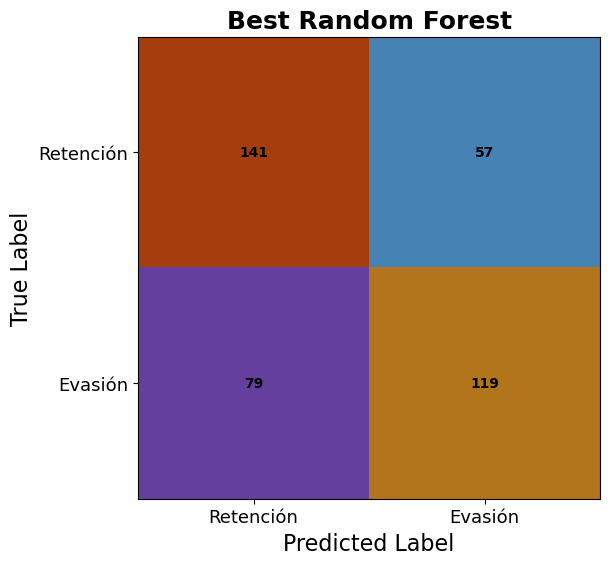

In [224]:
plot_conf_mat(random_forest, X_test, y_test, 'Best Random Forest', 'randomforest')

### <font color='#f07c3e'>**Best Logistic Regression**</font>

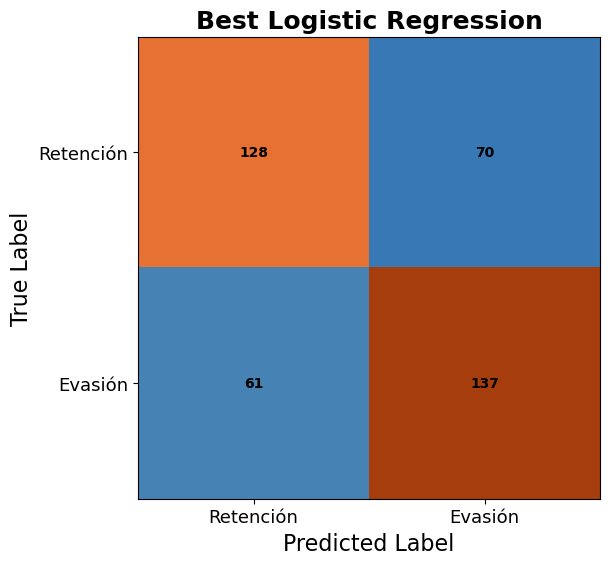

In [225]:
plot_conf_mat(log_reg, X_linear_test, y_linear_test, 'Best Logistic Regression', 'log_reg')

### <font color='#f07c3e'>**Best K-Nearest Neighbors**</font>

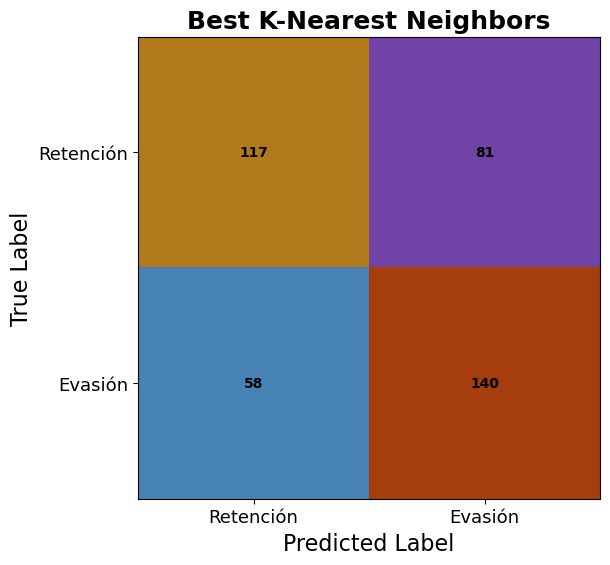

In [226]:
plot_conf_mat(knn, X_scaled_test, y_scaled_test, 'Best K-Nearest Neighbors', 'knn')

### <font color='#f07c3e'>**Best XGBoost Classifier**</font>

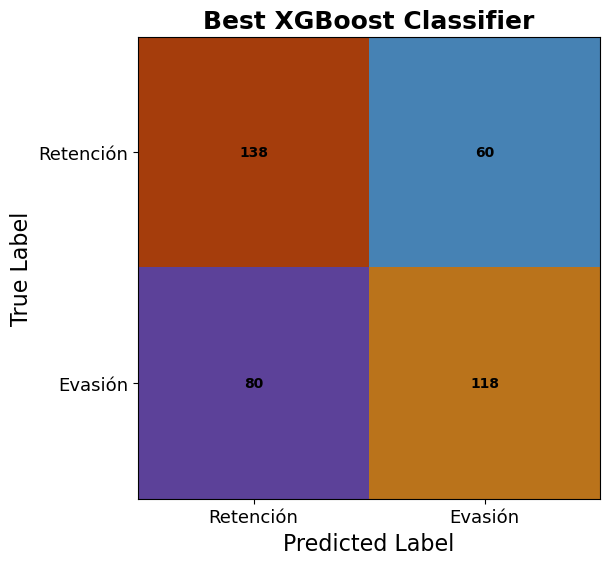

In [227]:
plot_conf_mat(xgb, X_test, y_test, 'Best XGBoost Classifier', 'xgb')

### <font color='#f07c3e'>**Best Support Vector Machine**</font>

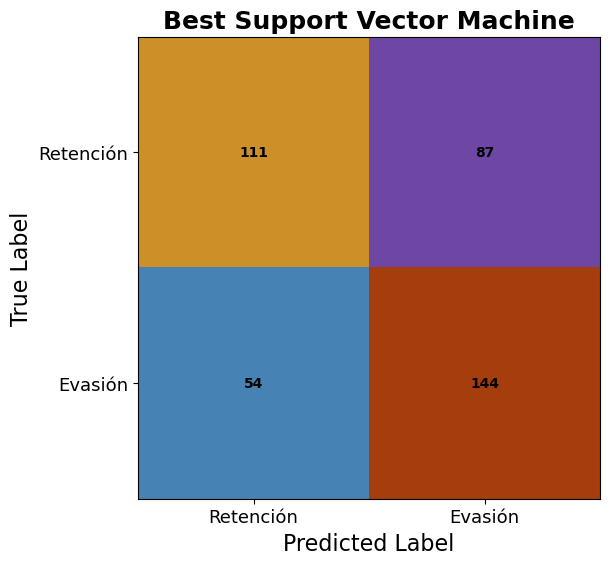

In [228]:
plot_conf_mat(svm, X_linear_test, y_linear_test, 'Best Support Vector Machine', 'svm')

## <font color='#ebac3a'>**Conclusiones: Best Models Confusion Matrices**</font>

Los resultados visualizados en las matrices de confusión reafirman lo observado en las métricas generales. El modelo con **mayor capacidad para identificar correctamente a los clientes que abandonan** fue **Support Vector Machine (SVM)**, con un total de **145 verdaderos positivos**, seguido por **Logistic Regression** con **141 acciertos** y por último **K-Nearest Neighbors (KNN)**, con **140 aciertos**.

Aunque los tres modelos obtienen un **Recall** cercanos entre sí, la diferencia radica en la **Precisión**. Los modelo **SVM** y **KNN** tienden a clasificar como evasión a un mayor número de clientes que, en realidad, no tienen intención de abandonar. Esto implica una **mayor tasa de falsos positivos**, lo cual podría derivar en **costos operativos innecesarios** al implementar estrategias de retención sobre un grupo de bajo riesgo.

En contraste, los modelos basados en árboles (**Random Forest** y **XGBoost Classifier**) mostraron un mejor desempeño a la hora de identificar correctamente a los clientes que **no** abandonan (verdaderos negativos). Sin embargo, este comportamiento no responde al objetivo principal del modelo, que es **maximizar la detección de potenciales bajas** para poder **anticipar y reducir la evasión (churn)**.

En resumen:
- **Logistic Regression** ofrece el mejor balance entre Recall y Precisión, con una **mayor capacidad de generalización**.
- **K-Nearest Neighbors** y **Support Vector Machine** alcanza un Recall competitivo, pero a costa de una caída singificativa en la Precisión.
- **Random Forest** y **XGBoost** se destacan más por su capacidad de detectar retención que por anticipar evasión, lo cual los hace menos alineados con el propósito del negocio.

## <font color='#ebac3a'>**Importancias y Coeficientes**</font>

### <font color='#f07c3e'>**Best Random Forest - Importancias**</font>

In [229]:
rf_importancias = random_forest.feature_importances_
features = X_test.columns

df_importancias_rf = pd.DataFrame({'Feature': features,
                                   'Importancia': rf_importancias}).sort_values('Importancia', ascending=False)
df_importancias_rf

,Feature,Importancia
23,Tenure,0.201189
25,ChargesTotal,0.184178
24,ChargesMonthly,0.134781
15,Contract_Month-to-month,0.057805
21,PaymentMethod_Electronic check,0.040120
17,Contract_Two year,0.027433
12,TechSupport_Yes,0.027372
7,InternetService_Fiber optic,0.027271
9,OnlineSecurity_Yes,0.026110
3,Dependents_Yes,0.023859


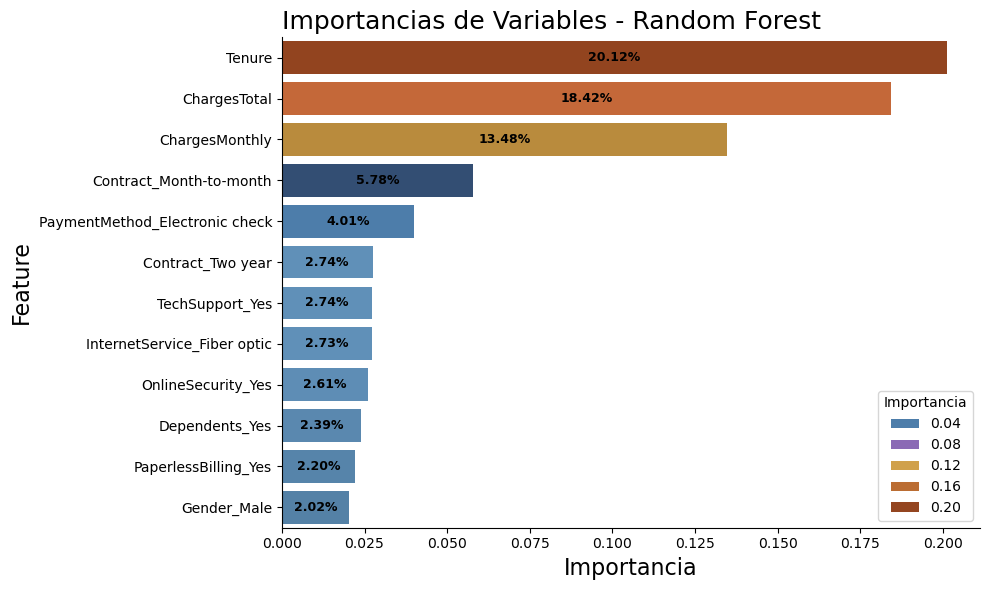

In [230]:
plot_analisis_variables(df=df_importancias_rf, 
                        analisis='Importancia',
                        nombre_modelo='Random Forest',
                        n_vars=12,
                        save='RandomForest')

In [231]:
df_importancias_rf['Feature'].head(12)

23                            Tenure
25                      ChargesTotal
24                    ChargesMonthly
15           Contract_Month-to-month
21    PaymentMethod_Electronic check
17                 Contract_Two year
12                   TechSupport_Yes
7        InternetService_Fiber optic
9                 OnlineSecurity_Yes
3                     Dependents_Yes
18              PaperlessBilling_Yes
0                        Gender_Male
Name: Feature, dtype: object

In [232]:
importancia_12 = np.round(df_importancias_rf['Importancia'].head(12).sum(), 4)
print(f'Importancia de las 12 variables más relevantes: {importancia_12}')

Importancia de las 12 variables más relevantes: 0.7923


### <font color='#8b5fc4'>**Observaciones: Best Random Forest - Importancias**</font>

A partir de las importancias determinadas por el mejor modelo de Random Forest, se seleccionaron las 12 variables con una importancia superior a **0.02**:

* Tenure
* ChargesTotal
* ChargesMonthly
* Contract_Month-to-month
* PaymentMethod_Electronic check
* Contract_Two year
* TechSupport_Yes
* InternetService_Fiber optic
* OnlineSecurity_Yes
* Dependents_Yes
* PaperlessBilling_Yes
* Gender_Male

La suma de sus importancias alcanza un **79.23%**, lo que indica que estas variables explican la mayor parte de las decisiones del modelo. En otras palabras, contribuyen en casi un **80%** a reducir la impureza de los nodos de los árboles de decisión.

En particular, las tres variables numéricas —`Tenure` (**20.12%**), `ChargesTotal` (**18.42%**) y `ChargesMonthly` (**13.48%**)— representan juntas el **52.02%** de la importancia total. Esto sugiere que el modelo empieza a dividir los datos principalmente en función de estas variables, logrando más de la mitad de la reducción de impureza con ellas solas.

Sin embargo, este tipo de modelo no permite evaluar **cuánto** impacta cada variable en la probabilidad de Evasión (Churn). La importancia asignada a cada variable refleja **qué tan útil** resulta para reducir la impureza entre clases durante la construcción de los árboles, pero **no permite interpretar ni la magnitud ni la dirección** de su efecto sobre el resultado, ya que **no se basa en coeficientes** como lo hacen los modelos lineales.

### <font color='#f07c3e'>**Best Logistic Regression - Coeficientes**</font>

In [233]:
coeficientes = log_reg.coef_
features = X_linear_test.columns

df_coeficientes_logreg = pd.DataFrame({'Feature': features,
                                       'Coeficiente': coeficientes[0]}).sort_values('Coeficiente', ascending=False)

df_coeficientes_logreg

,Feature,Coeficiente
22,ChargesTotal_scaled,1.942420
16,PaperlessBilling_Yes,0.353347
18,PaymentMethod_Electronic check,0.328925
6,InternetService_Fiber optic,0.228289
13,StreamingMovies_Yes,0.118282
1,SeniorCitizen_Yes,0.102602
5,MultipleLines_Yes,0.032338
12,StreamingTV_Yes,0.004257
7,NoInternetService,0.000000
0,Gender_Male,-0.022401


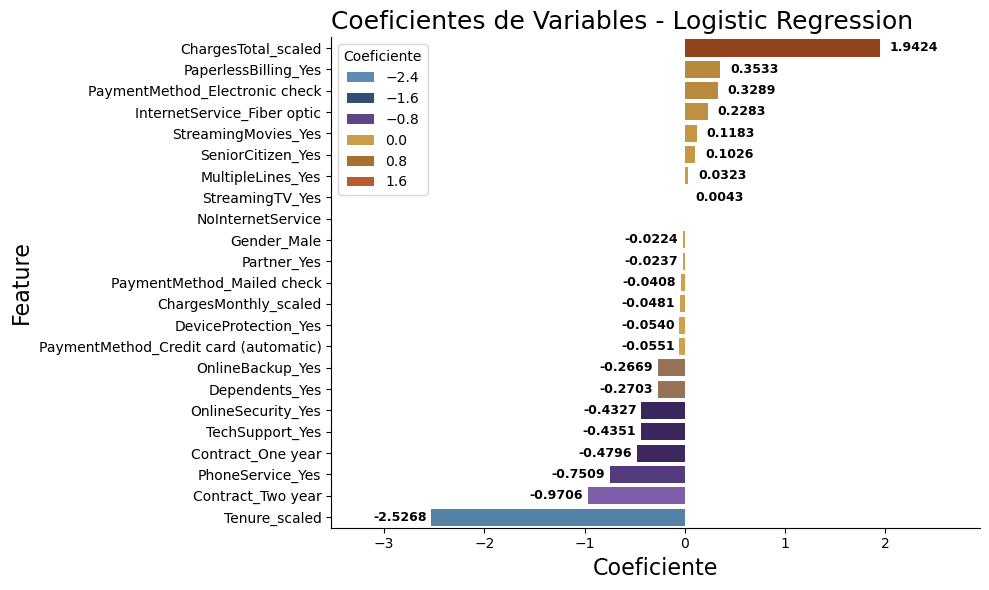

In [234]:
plot_analisis_variables(df=df_coeficientes_logreg, 
                        analisis='Coeficiente',
                        nombre_modelo='Logistic Regression',
                        save='LogReg')

### <font color='#8b5fc4'>**Observaciones: Best Logistic Regression - Coeficientes**</font>

Los modelos lineales como **Regresión Logística** ofrecen una ventaja significativa frente a los modelos de árboles: permiten interpretar tanto la **dirección** como la **magnitud** del impacto de cada variable sobre la **probabilidad de Evasión (Churn)**.

Este análisis se basa en un modelo entrenado utilizando `OneHotEncoder(drop='first')` y penalización **L1 (Lasso)**, lo que implica:
* Los coeficientes están **en relación a la categoría omitida** de cada variable categórica.
* Las variables irrelevantes son automáticamente descartadas (`coef = 0`).


#### **Dirección del impacto**
- **Coeficientes positivos**: Aumentan la probabilidad de churn.
- **Coeficientes negativos**: Disminuyen la probabilidad de churn.


#### **Magnitud del impacto**
Los coeficientes representan el cambio en los **log-odds** de churn por unidad de cambio en la variable (escalada), manteniendo constantes las demás.

$$
\Large \text{log-odds} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$$

Para convertir los logits a probabilidades usamos la función sigmoide, y para interpretar el cambio marginal usamos el **odds ratio**:

$$
\Large odds_{ratio} = e^{\beta_i}
$$


#### **Variables protectoras contra churn**

* `Tenure_scaled = -2.5268`

$$
\Large  odds_{ratio} = e^{-2.5268} \approx 0.080   \text{Reduce las chances en un } 92\%
$$

* `Contract_Two year = -0.9706`  

$$
\Large  odds_{ratio} = e^{-0.9706} \approx 0.378 
$$
$$
\Large 1 - 0.378 = \text{Reduce las chances en un } \approx 62.2\%
$$

* `TechSupport_Yes = -0.4351`, `OnlineSecurity_Yes = -0.4327`, `Dependents_Yes = -0.2703`  

También contribuyen a **reducir la probabilidad de churn**.


#### **Variables que aumentan el riesgo de churn**

* `ChargesTotal_scaled = 1.9424`  

$$
\Large  odds_{ratio} = e^{1.9424} \approx 6.97  \Rightarrow \text{Aumenta el riesgo casi 7 veces}
$$

* `PaperlessBilling_Yes = 0.3533`, `PaymentMethod_Electronic check = 0.3289`, `InternetService_Fiber optic = 0.2283`
  
  Estas variables también se asocian a **mayor propensión a churn**.


#### **Variables omitidas vs coeficientes**

Dado que se usó `drop='first'`, todos los coeficientes de variables categóricas deben interpretarse **relativamente a la categoría omitida**. Por ejemplo:

- `Contract_Two year` y `Contract_One year` están en relación a `Contract_Month-to-month` (omitida). Lo que implica que, por ejemplo, estas dos variables al tener coeficiente negativo, los log-odds (logits) disminuyen en $1 - e^{\beta_i}$ en relación a si el cliente tiene `Contract_Month-to-month = 1`
- `PaymentMethod_Electronic check`, `Mailed check`, y `Credit card` se comparan con `Bank transfer (automatic)` de la misma manera.


#### **Tensión aparente entre** `ChargesTotal` y `Tenure`

Aunque estas dos variables están altamente correlacionadas (0.94), lo que singifica que se comportan de manera directamente proporcional, sus coeficientes tienen signos opuestos:

* `Tenure_scaled` tiene un coeficiente negativo (protege contra churn).
* `ChargesTotal_scaled` tiene un coeficiente positivo (aumenta riesgo de churn).

Esta aparente contradicción puede explicarse porque:

- **`Tenure` refleja antigüedad y lealtad**: clientes con más tiempo suelen ser más fieles y menos propensos a abandonar.
- **`ChargesTotal` representa el monto acumulado cobrado** y puede captar otros factores, como clientes con altos cargos que podrían estar insatisfechos o que enfrentan cambios recientes en tarifas o servicios.

En otras palabras, el modelo podría estar detectando que, entre clientes con alta antigüedad, aquellos con cargos acumulados muy elevados presentan un riesgo mayor de churn, quizás debido a insatisfacción por costos crecientes o servicios cambiantes. Probablemente los clientes que fueron seleccionados como outliers en la etapa anterior, pero que se decidieron conservar para captar justamente este tipo de fenómenos. Lo que sugiere que deberían analizarse de forma separada, buscando qué factores son los que llevan a clientes con un Gasto Total (ChargesTotal) elevado a abandonar la empresa.

#### **Variables descartadas**

El modelo descartó automáticamente algunas variables, asignándoles coeficiente 0. Esto significa que **no aportan valor predictivo adicional** al resto de variables del modelo:

- `NoInternetService = 0.000`
- `Gender_Male = -0.022` (muy cercano a 0)


#### **Conclusión**

La regresión logística con Lasso permite construir un modelo interpretable, robusto y selectivo.  
Gracias al uso de codificación `drop='first'` y regularización, se logra:

- Evitar la multicolinealidad.
- Detectar **factores clave de riesgo y protección**.
- Explicar con claridad la lógica del modelo al negocio.

In [235]:
np.exp(-2.5268)

0.07991433744038948

In [236]:
1 - np.exp(-2.5268)

0.9200856625596106

In [237]:
np.exp(-0.9706)

0.37885565650183867

In [238]:
1 - np.exp(-0.9706)

0.6211443434981614

In [239]:
np.exp(1.9424)

6.975472030212183

Se agregará al `DataFrame` de los coeficientes el $odds_{ratio}$ y una columna con la interpretación de cada variable para entender el impacto de cada una de ellas.

In [240]:
odds_ratios = []
interpretaciones = []

for coeficiente in df_coeficientes_logreg['Coeficiente']:
    odds_ratio = np.round(np.exp(coeficiente), 4)
    odds_ratios.append(odds_ratio)
    if coeficiente > 0:
        impacto = np.round((odds_ratio - 1)*100, 2)
        interpretacion = f'Aumenta las chances en: {impacto}%'
    elif coeficiente < 0:
        impacto = np.round((1 - odds_ratio)*100, 2)
        interpretacion = f'Disminuye las chances en: {impacto}%'
    else:
        interpretacion = 'Sin impacto'
    interpretaciones.append(interpretacion)
    
df_coeficientes_logreg['Odds Ratio'] = odds_ratios
df_coeficientes_logreg['Interpretación'] = interpretaciones

df_coeficientes_logreg

,Feature,Coeficiente,Odds Ratio,Interpretación
22,ChargesTotal_scaled,1.942420,6.9756,Aumenta las chances en: 597.56%
16,PaperlessBilling_Yes,0.353347,1.4238,Aumenta las chances en: 42.38%
18,PaymentMethod_Electronic check,0.328925,1.3895,Aumenta las chances en: 38.95%
6,InternetService_Fiber optic,0.228289,1.2564,Aumenta las chances en: 25.64%
13,StreamingMovies_Yes,0.118282,1.1256,Aumenta las chances en: 12.56%
1,SeniorCitizen_Yes,0.102602,1.1081,Aumenta las chances en: 10.81%
5,MultipleLines_Yes,0.032338,1.0329,Aumenta las chances en: 3.29%
12,StreamingTV_Yes,0.004257,1.0043,Aumenta las chances en: 0.43%
7,NoInternetService,0.000000,1.0000,Sin impacto
0,Gender_Male,-0.022401,0.9778,Disminuye las chances en: 2.22%


**Para una visualización más clara de las variables que más impactan en la probabilidad de Evasión (Churn), se seleccionaran las 12 variables con coeficientes más significativos.**

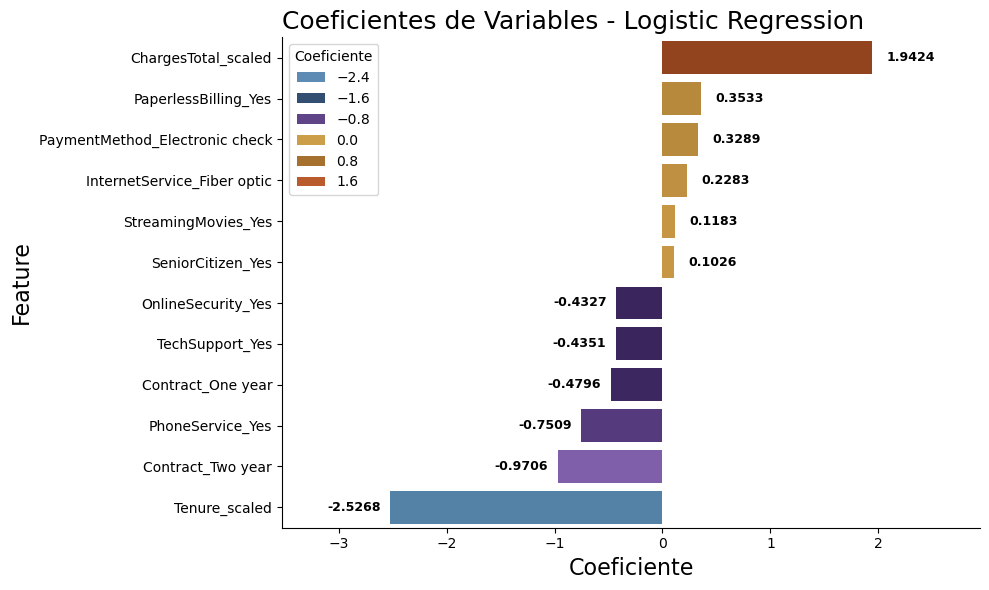

In [241]:
plot_analisis_variables(df=df_coeficientes_logreg, 
                        analisis='Coeficiente',
                        nombre_modelo='Logistic Regression',
                        n_vars=12,
                        save='LogReg_best_coef')

In [242]:
df1 = df_coeficientes_logreg.head(6)
df2 = df_coeficientes_logreg.tail(6)
df_best_coef_logreg = pd.concat([df1, df2]).reset_index(drop=True)
df_best_coef_logreg

,Feature,Coeficiente,Odds Ratio,Interpretación
0,ChargesTotal_scaled,1.942420,6.9756,Aumenta las chances en: 597.56%
1,PaperlessBilling_Yes,0.353347,1.4238,Aumenta las chances en: 42.38%
2,PaymentMethod_Electronic check,0.328925,1.3895,Aumenta las chances en: 38.95%
3,InternetService_Fiber optic,0.228289,1.2564,Aumenta las chances en: 25.64%
4,StreamingMovies_Yes,0.118282,1.1256,Aumenta las chances en: 12.56%
5,SeniorCitizen_Yes,0.102602,1.1081,Aumenta las chances en: 10.81%
6,OnlineSecurity_Yes,-0.432672,0.6488,Disminuye las chances en: 35.12%
7,TechSupport_Yes,-0.435146,0.6472,Disminuye las chances en: 35.28%
8,Contract_One year,-0.479629,0.6190,Disminuye las chances en: 38.1%
9,PhoneService_Yes,-0.750902,0.4719,Disminuye las chances en: 52.81%


### <font color='#f07c3e'>**Best K-Nearest Neighbors - Importancias**</font>

El modelo **K-Nearest Neighbors (KNN)** no trabaja con coeficientes ni con medidas directas de importancia, ya que su funcionamiento se basa en calcular la **distancia entre observaciones** y clasificar cada punto según la mayoría de los **K vecinos más cercanos**.

Sin embargo, mediante la técnica de **permutación de variables**, es posible estimar la importancia relativa de cada atributo. Esta técnica evalúa cuánto se deteriora el rendimiento del modelo al desordenar aleatoriamente los valores de una variable. Las variables cuya permutación más perjudica el desempeño general del modelo son consideradas las más relevantes para la separación de clases.

In [243]:
from sklearn.inspection import permutation_importance

importancias = permutation_importance(
    knn,
    X_scaled_test,
    y_scaled_test,
    scoring='f1',
    n_repeats=10,
    random_state=42)

In [244]:
df_importancias_knn = pd.DataFrame({'Feature': X_scaled_test.columns,
                                    'Importancia': importancias['importances_mean']}).sort_values('Importancia', ascending=False)
df_importancias_knn

,Feature,Importancia
25,ChargesTotal_scaled,0.066749
23,Tenure_scaled,0.061640
12,TechSupport_Yes,0.032555
5,MultipleLines_Yes,0.024393
24,ChargesMonthly_scaled,0.017350
22,PaymentMethod_Mailed check,0.016741
2,Partner_Yes,0.016705
11,DeviceProtection_Yes,0.013935
1,SeniorCitizen_Yes,0.013009
14,StreamingMovies_Yes,0.010565


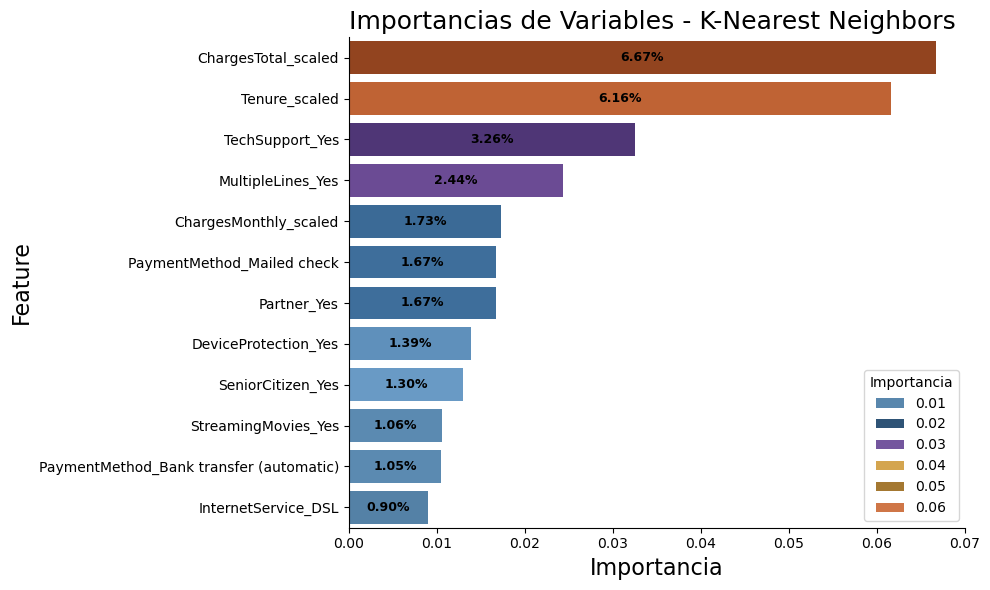

In [245]:
plot_analisis_variables(df=df_importancias_knn, 
                        analisis='Importancia',
                        nombre_modelo='K-Nearest Neighbors',
                        save='KNN',
                        n_vars=12)

In [246]:
df_importancias_knn['Feature'].head(12)

25                        ChargesTotal_scaled
23                              Tenure_scaled
12                            TechSupport_Yes
5                           MultipleLines_Yes
24                      ChargesMonthly_scaled
22                 PaymentMethod_Mailed check
2                                 Partner_Yes
11                       DeviceProtection_Yes
1                           SeniorCitizen_Yes
14                        StreamingMovies_Yes
19    PaymentMethod_Bank transfer (automatic)
6                         InternetService_DSL
Name: Feature, dtype: object

### <font color='#8b5fc4'>**Observaciones: Best K-Nearest Neighbors - Importancias**</font>

La manera de interpretar la importancia de las variables determinada mediante **permutación** (`permutation_importance`) es la siguiente:

Cuando se **desordena aleatoriamente** una variable $X_i$, el desempeño del modelo —medido en este caso con el **F1-score**— **disminuye en promedio un valor $y_i$**.

Esto indica que dicha variable es relevante para el modelo: **cuanto mayor la caída del rendimiento al desordenarla, mayor su importancia**.

Por lo tanto, al tomar las **12 variables más importantes** determinadas por el modelo KNN, aquellas que tienen **mayor impacto** en la decisión final (a través de la proximidad con sus vecinos más cercanos) son, en orden descendente:

- `ChargesTotal_scaled`
- `Tenure_scaled`
- `TechSupport_Yes`
- `MultipleLines_Yes`
- `ChargesMonthly_scaled`
- `PaymentMethod_Mailed check`
- `Partner_Yes`
- `DeviceProtection_Yes`
- `SeniorCitizen_Yes`
- `StreamingMovies_Yes`
- `PaymentMethod_Bank transfer (automatic)`
- `InternetService_DSL`

Este tipo de análisis, al igual que con **Random Forest**, **no permite evaluar el signo ni la magnitud del impacto** de cada variable sobre la **probabilidad de Evasión (Churn)**.  
En cambio, solo indica **cuán útil es cada variable** para mejorar la clasificación correcta dentro del modelo.

### <font color='#f07c3e'>**Best XGBoost Classifier - Importancias**</font>

In [247]:
#xgb_best = xgb.best_estimator_
importancias_xgb = xgb.feature_importances_ #xgb_best.feature_importances_
features = X_test.columns

df_importancias_xgb = pd.DataFrame({'Feature': features,
                                    'Importancia': importancias_xgb}).sort_values('Importancia', ascending=False)

df_importancias_xgb

,Feature,Importancia
15,Contract_Month-to-month,0.378036
7,InternetService_Fiber optic,0.194847
23,Tenure,0.097530
4,PhoneService_Yes,0.060844
21,PaymentMethod_Electronic check,0.029308
16,Contract_One year,0.025391
3,Dependents_Yes,0.020633
24,ChargesMonthly,0.016894
12,TechSupport_Yes,0.014081
9,OnlineSecurity_Yes,0.013997


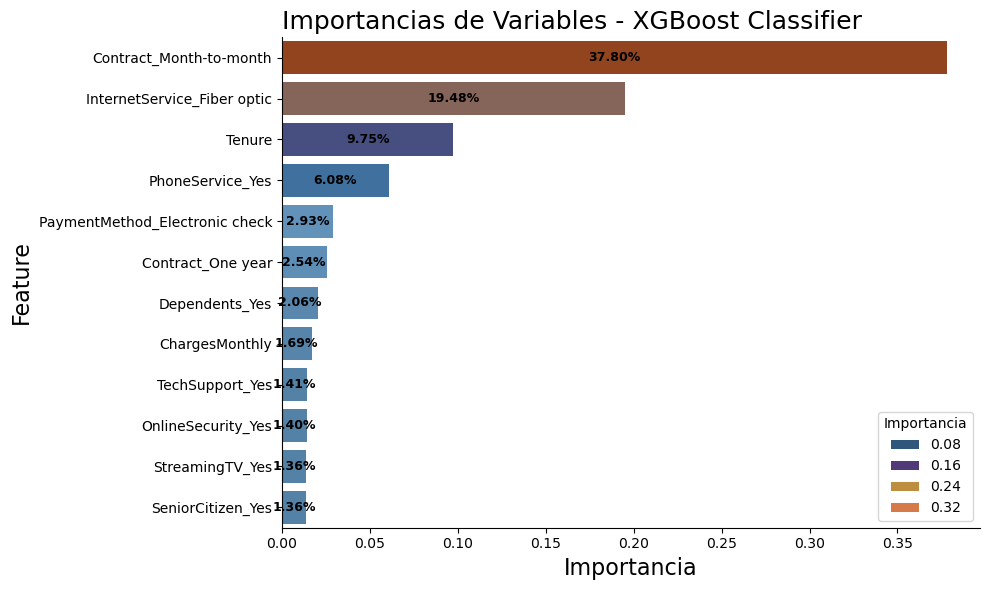

In [248]:
plot_analisis_variables(df=df_importancias_xgb, 
                        analisis='Importancia',
                        nombre_modelo='XGBoost Classifier',
                        save='XGB',
                        n_vars=12)

In [249]:
sum_importancias_xgb = np.round(df_importancias_xgb['Importancia'].head(12).sum(), 4)

In [250]:
sum_importancias_xgb

0.8787

### <font color='#8b5fc4'>**Observaciones: Best XGBoost Classifier - Importancias**</font>

Las **12 variables** más importantes según el modelo `Best XGB Classifier` representan el **80.1%** de las decisiones tomadas por los árboles de decisión que lo componen. Esto indica que, en promedio, los árboles basaron la mayor parte de sus **criterios de ramificación** en las siguientes variables:

* `Contract_Month-to-month`
* `InternetService_Fiber optic`
* `Tenure`
* `PhoneService_Yes`
* `PaymentMethod_Electronic check`
* `Contract_One year`
* `Dependents_Yes`
* `NoInternetService`
* `Contract_Two year`
* `OnlineSecurity_Yes`
* `SeniorCitizen_Yes`
* `ChargesMonthly`


Sin embargo, los modelos de arquitectura de árbol no permiten cuantificar el impacto de cada una de ellas, sino solo entender que tanto ayudan a reducir la impureza entre clases.

### <font color='#f07c3e'>**Best Support Vector Machine - Coeficientes**</font>

In [251]:
svm_coeficientes = svm.coef_[0]
features = X_linear_train.columns

df_coeficientes_svm = pd.DataFrame({'Feature': features,
                                    'Coeficiente': svm_coeficientes}).sort_values('Coeficiente', ascending=False)

In [252]:
df_coeficientes_svm

,Feature,Coeficiente
22,ChargesTotal_scaled,2.034655
6,InternetService_Fiber optic,0.430108
16,PaperlessBilling_Yes,0.288181
18,PaymentMethod_Electronic check,0.235187
13,StreamingMovies_Yes,0.120351
12,StreamingTV_Yes,0.053764
5,MultipleLines_Yes,0.052008
1,SeniorCitizen_Yes,0.036585
10,DeviceProtection_Yes,0.001561
2,Partner_Yes,-0.005362


### <font color='#8b5fc4'>**Observaciones: Best Support Vector Machine - Coeficientes**</font>

A diferencia de la **Regresión Logística**, los coeficientes de **Suport Vector Machine** no tienen interpretabilidad probabilística.
En este caso:

El signo del coeficiente indica la dirección del impacto sobre la clase positiva (Churn = 1), es decir, coeficientes negativos reducen la probabilidad de Churn y coeficientes positivos aumentan la probabilidad de Churn. Pero no es cuantificable como en `Logistic Regression` que es posible entender el impacto que cada variable tiene, sino que aquí la magnitud del coeficiente refleja la importancia relativa.

El modelo determina que:

#### 6 Variables que ofrecen mayor protección contra la Evasión (Churn):

|Variable         | Coeficiente|
|-----------------|------------|
|Tenure_scaled	  |-2.624387   |
|Contract_Two year|-1.097956   |
|Contract_One year|-0.782270   |
|PhoneService_Yes |-0.541890   |
|OnlineSecurity_Yes|-0.511930  |
|TechSupport_Yes  |-0.500149   |

#### 6 Variables de mayor riesgo de Evasión (Churn):

|Variable                       | Coeficiente|
|-------------------------------|------------|
|ChargesTotal_scaled            |2.034655    |
|InternetService_Fiber optic    |0.430108    |
|PaperlessBilling_Yes           |0.288181    |
|PaymentMethod_Electronic check |0.235187    |
|StreamingMovies_Yes	        |0.120351    |
|StreamingTV_Yes	            |0.053764    |



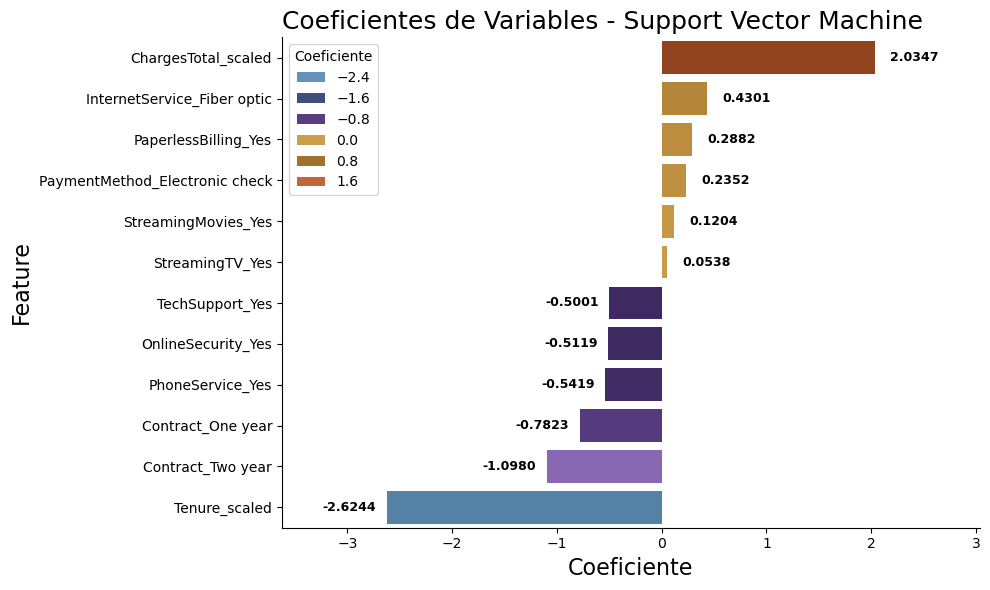

In [253]:
plot_analisis_variables(df=df_coeficientes_svm, 
                        analisis='Coeficiente',
                        nombre_modelo='Support Vector Machine',
                        save='SVM',
                        n_vars=12)

# <font color='#5a9bd4'>**6. Champion Model**</font>

In [254]:
pd.DataFrame(metricas_eval)

,Model,Accuracy,Precision,Recall,F1-score
0,Best Random Forest,0.6566,0.6761,0.6010,0.6364
1,Best Logistic Regression,0.6692,0.6618,0.6919,0.6765
2,Best K-Nearest Neighbors,0.6490,0.6335,0.7071,0.6683
3,Best XGBoost Classifier,0.6465,0.6629,0.5960,0.6277
4,Best Support Vector Machine,0.6439,0.6234,0.7273,0.6713


Después de los experimentos realizados y las conclusiones inferidas, se seleccionará a `Best Logistic Regression` como **Champion Model** para su uso en entorno productivo.

El objetivo principal del negocio es **predecir de forma anticipada qué clientes tienen mayor probabilidad de cancelar el servicio**, permitiendo accionar campañas de retención a tiempo.  
Por ello, la métrica prioritaria es el **Recall**, que mide la proporción de verdaderos positivos detectados correctamente.

Si bien `Best Support Vector Machine` cuenta con un **Recall 3% mayor** en relación a `Best Logistic Regression`, la elección de este último está basada en el hecho de que el conjunto de datos total contaba con 7152 observaciones, lo que implicaría una diferencia de apenas 30 clientes mal identificados por cada 1000, un margen que no justifica sacrificar estabilidad y generalización. Sin embargo, la estabilidad de `Best Logistic Regression` lo convierte, a mi parecer, en el modelo más confiable para entorno productivo. Si el volumen de
clientes aumenta considerablemente, se deberá reevaluar cuál es el mejor modelo para el problema en cuestión.

### <font color='#f07c3e'>Comparación Best Models</font>

| Modelo                    | Recall (Validación) | Recall (Test) | Variación (%) | F1-score (Test)  |
|---------------------------|---------------------|---------------|----------------|-----------------|
| **Logistic Regression**   | 0.7167              | 0.6919        | **-2.48%**     | **0.6765**      |
| Support Vector Machine    | 0.7750              | 0.7273        | -4.47%         | 0.6713          |
| K-Nearest Neighbors       | 0.7458              | 0.7071        | -3.87%         | 0.6683          |
| Random Forest             | 0.7292              | 0.6010        | -12.82%        | 0.6364          |
| XGBoost                   | 0.7000              | 0.5909        | -10.91%        | 0.6207          |



### <font color='#f07c3e'>Razones para Seleccionar Logistic Regression</font>

- Menor caída de rendimiento entre validación y datos no vistos (test).
- Mejor F1-score general en test, lo que indica un buen balance entre Recall y Precisión.
- Modelo interpretable: permite explicar cuánto influye cada variable y en que dirección al realizar predicciones.


### <font color='#f07c3e'>Recomendación Final</font>

Se recomienda **utilizar Logistic Regression regularizada (L1)** como modelo de producción, dado que:

- Presenta el **mejor equilibrio entre rendimiento y generalización**.
- Es **más fácil de mantener e interpretar**.
- **Escala mejor en entornos de producción con datos limitados**.

Este modelo podrá ser reevaluado cuando la empresa cuente con **mayor volumen de datos** o requiera modelos más sofisticados. 

In [255]:
with open(CHAMPION_PATH / 'robust_scaler.pkl', 'wb') as f:
    pickle.dump(robust_scaler, f)

assert hasattr(one_hot_linear, 'transformers_')  # Esto solo existe si fue fiteado

with open(CHAMPION_PATH / 'linear_one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_linear, f)

with open(CHAMPION_PATH / 'target_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
    
with open(CHAMPION_PATH / 'champion_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

with open(CHAMPION_PATH / 'columns_order.pkl', 'wb') as f:
    pickle.dump(X_linear.columns.to_list(), f)

# ***NOTA:***

**Diseñar un pipeline que lea archivos como el original y tome los valores correspondientes del cliente y que devuelva el id del cliente junto con la probabilidad de Churn utilizando el mejor modelo obtenido**

# <font color='#5a9bd4'>**7. Pipeline de prueba en entorno productivo**</font>

Se generará una pipeline de entorno productivo recibiendo un archivo json con datos crudos, generados artificialmente con `SMOTENC` a partir de una muestra de los datos originales.
Esto permitirá evaluar el proceso de ETL, predicción, y comunicación de resultados en un archivo simple de visualizar o analizar.

## <font color='#ebac3a'>**Generación de datos artificiales**</font>

In [256]:
URL = 'https://raw.githubusercontent.com/ignaciomajo/proyecto_TelecomX/refs/heads/main/src/preprocessed_TelecomX_data.json'

df_smote = pd.read_json(URL)
df_smote.head()

try:
    URL = 'https://raw.githubusercontent.com/ignaciomajo/proyecto_TelecomX/refs/heads/main/src/clientes_altovalor_abandonan.json'
    outliers = pd.read_json(URL)
    # Concatenar ambos DafaFrame verticalmente
    df_smote = pd.concat([df_smote, outliers], axis=0)
    # Mezclar los datos ya que sino quedaran los outliers ubicados todos al final
    df_smote = df_smote.sample(frac=1, random_state=42).reset_index(drop=True)
except Exception as e:
    print('No se encontró el archivo correspondiente, o hubo un problema al cargar los datos')
    print(f'Error: {e}')

In [257]:
df_smote

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal,Churn
0,8562-GHPPI,Female,No,No,No,1,Yes,No,No,No,...,No,No,No,Month-to-month,No,Credit card (automatic),0.66,19.80,19.80,No
1,5196-WPYOW,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,No,No,One year,No,Mailed check,2.00,60.05,3994.05,No
2,8785-CJSHH,Female,No,Yes,No,60,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.33,99.80,5985.75,No
3,3594-KADLU,Male,No,Yes,No,3,No,No,DSL,Yes,...,Yes,No,No,Month-to-month,No,Mailed check,1.17,35.10,101.10,No
4,4671-VJLCL,Female,No,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Credit card (automatic),2.66,79.85,4861.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,5310-NOOVA,Male,No,No,No,46,Yes,No,No,No,...,No,No,No,Two year,No,Electronic check,0.66,19.95,907.05,No
7148,7302-ZHMHP,Female,No,No,No,1,Yes,No,No,No,...,No,No,No,Month-to-month,No,Mailed check,0.64,19.15,19.15,No
7149,7356-AYNJP,Female,No,No,No,4,Yes,Yes,No,No,...,No,No,No,One year,No,Electronic check,0.80,23.90,97.50,No
7150,7601-WFVZV,Male,No,No,No,1,Yes,No,No,No,...,No,No,No,Month-to-month,No,Mailed check,0.65,19.55,19.55,No


In [258]:
sample = int(7152 * 0.4)

In [259]:
sample_smote = df_smote.sample(sample)

In [261]:
sample_smote.shape

(2860, 22)

In [262]:
sample_smote.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'ChargesDaily', 'ChargesMonthly', 'ChargesTotal',
       'Churn'],
      dtype='object')

In [263]:
cat_cols = sample_smote.select_dtypes(include='object').columns.tolist()
num_cols = sample_smote.select_dtypes(include='float').columns.tolist()
cat_cols.remove('CustomerID')
cat_cols.remove('Churn')
target = 'Churn'

In [264]:
le_dict = {}

for col in cat_cols + [target]:
    le = LabelEncoder()
    sample_smote[col] = le.fit_transform(sample_smote[col])
    le_dict[col] = le

In [269]:
X_smote = sample_smote.drop(['CustomerID', target], axis=1)
y_smote = sample_smote[target]

cat_indices = [X_smote.columns.get_loc(col) for col in cat_cols]

In [270]:
X_smote.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'ChargesDaily', 'ChargesMonthly', 'ChargesTotal'],
      dtype='object')

In [271]:
cat_indices

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [272]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=cat_indices, random_state=42)
X_os, y_os = smote.fit_resample(X_smote, y_smote)

In [273]:
X_os[target] = y_os

In [274]:
df_artificial = X_os.copy()

In [275]:
for col in cat_cols + [target]:
    df_artificial[col] = le_dict[col].inverse_transform(df_artificial[col])

In [276]:
df_artificial.sample(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal,Churn
3928,Female,No,Yes,Yes,61,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.472782,104.161237,6263.090552,Yes
820,Male,No,No,No,21,Yes,Yes,Fiber optic,Yes,No,...,No,Yes,Yes,Month-to-month,No,Mailed check,3.460000,103.850000,2215.000000,No
433,Female,No,Yes,No,71,Yes,Yes,No,No,No,...,No,No,No,Two year,Yes,Credit card (automatic),0.860000,25.950000,1801.900000,No
4091,Female,No,No,No,6,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,2.763299,82.815166,499.028829,Yes
551,Male,No,No,No,19,Yes,Yes,Fiber optic,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,2.820000,84.750000,1651.950000,No
2157,Female,No,Yes,Yes,7,Yes,No,No,No,No,...,No,No,No,Month-to-month,No,Mailed check,0.680000,20.450000,150.750000,No
682,Male,No,Yes,No,14,Yes,Yes,DSL,No,No,...,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),2.220000,66.600000,979.500000,No
2704,Male,No,No,Yes,56,Yes,Yes,No,No,No,...,No,No,No,Two year,Yes,Mailed check,0.830000,24.800000,1424.200000,No
3601,Male,No,No,No,3,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,1.756912,52.786338,168.903239,Yes
738,Female,No,No,No,27,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),3.190000,95.600000,2595.250000,No


In [277]:
df_artificial['CustomerID'] = [f'99999-AD{i}' for i in range(len(df_artificial))]

In [278]:
df_artificial.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'ChargesDaily', 'ChargesMonthly', 'ChargesTotal', 'Churn',
       'CustomerID'],
      dtype='object')

In [279]:
order = ['CustomerID','Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'ChargesDaily', 'ChargesMonthly', 'ChargesTotal', 'Churn']

df_artificial = df_artificial[order]
df_artificial.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal,Churn
0,99999-AD0,Male,Yes,No,No,14,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,2.50,74.95,1036.75,Yes
1,99999-AD1,Male,No,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Bank transfer (automatic),3.53,106.00,4178.65,No
2,99999-AD2,Male,No,No,No,38,Yes,No,No,No,...,No,No,No,One year,No,Mailed check,0.67,20.10,730.10,No
3,99999-AD3,Female,No,Yes,No,60,No,No,DSL,No,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),2.03,60.80,3603.45,No
4,99999-AD4,Male,No,No,No,39,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.55,106.40,4040.65,No


In [280]:
df_artificial.shape

(4110, 22)

In [281]:
df_artificial.to_json(DATA_PATH / 'datos_artificiales_labeled.json', orient='records', lines=True)

In [304]:
df_artificial_proba = df_artificial.drop('Churn', axis=1)
df_artificial_proba.to_json(DATA_PATH / 'datos_artificiales_proba.json', orient='records', lines=True)

In [282]:
with open(CHAMPION_PATH / 'cat_cols.pkl', 'wb') as f:
    pickle.dump(cat_cols, f)

In [324]:
num_cols = df_artificial.select_dtypes(include=['float', 'int'], exclude='object').columns.tolist()
num_cols

['Tenure', 'ChargesDaily', 'ChargesMonthly', 'ChargesTotal']

In [325]:
with open(CHAMPION_PATH / 'num_cols.pkl', 'wb') as f:
    pickle.dump(num_cols, f)

#### **Nota**:

Se conservarán también los datos originales dentro de la carpeta del proyecto por razones de completitud ya que fueron tomados a partir del URL del proyecto anterior.

In [285]:
URL = 'https://raw.githubusercontent.com/ignaciomajo/proyecto_TelecomX/refs/heads/main/src/preprocessed_TelecomX_data.json'

df_smote = pd.read_json(URL)
df_smote.to_json(DATA_PATH /'preprocessed_TelecomX_data.json', orient='records', lines=True)

try:
    URL = 'https://raw.githubusercontent.com/ignaciomajo/proyecto_TelecomX/refs/heads/main/src/clientes_altovalor_abandonan.json'
    outliers = pd.read_json(URL)
    outliers.to_json(DATA_PATH / 'clientes_altovalor_abandonan.json', orient='records', lines=True)
except Exception as e:
    print('No se encontró el archivo correspondiente, o hubo un problema al cargar los datos')
    print(f'Error: {e}')

## <font color='#ebac3a'>**Pipeline de prueba**</font>

In [286]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [287]:
class LoadDataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, url):
        self.url = url

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = pd.read_json(self.url)
        return df

In [288]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, include_churn=False):
        self.include_churn = include_churn
        self.drop_cols = ['CustomerID', 'ChargesDaily']
        if not include_churn:
            self.drop_cols.append('Churn')

    def fit(self, X, y=None):
        self.customer_ids = X['CustomerID'] if 'CustomerID' in X.columns else None
        return self

    def transform(self, X):
        return X.drop(columns=[col for col in self.drop_cols if col in X.columns])

In [302]:
with open(CHAMPION_PATH / 'robust_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open(CHAMPION_PATH / 'linear_one_hot_encoder.pkl', 'rb') as f:
    one_hot = pickle.load(f)

with open(CHAMPION_PATH / 'target_encoder.pkl', 'rb') as f:
    target_encoder = pickle.load(f)
    
with open(CHAMPION_PATH / 'champion_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open(CHAMPION_PATH / 'columns_order.pkl', 'rb') as f:
   order_cols = pickle.load(f)

with open(CHAMPION_PATH / 'cat_cols.pkl', 'rb') as f:
   cat_cols = pickle.load(f)

with open(CHAMPION_PATH / 'num_cols.pkl', 'rb') as f:
   num_cols = pickle.load(f)



production_processor = ColumnTransformer(transformers=[
    ('cat', one_hot, cat_cols),
    ('num', scaler, num_cols)
])
                                         
production_pipeline = Pipeline(steps=[
    ('drop', ColumnDropper(include_churn=False)),
    ('preprocess', production_processor),
    ('classifier', model)
], verbose=True)

monitor_processor = ColumnTransformer(transformers=[
    ('cat', one_hot, cat_cols),
    ('num', scaler, num_cols),
    ('target', target_encoder, 'Churn')
])

monitor_pipeline = Pipeline(steps=[
    ('drop', ColumnDropper(include_churn=True)),
    ('preprocess', monitor_processor),
    ('classifier', model)
])


def run_pipeline(file: str, mode: str='production'):

    data = pd.read_json(file, lines=True)
    
    from datetime import datetime
    log = datetime.now().strftime('%Y%m%d_%H%M%S')
    
    if mode == 'production':
        pred_proba = production_pipeline.predict_proba(data)
        pred_labels = production_pipeline.predict(data)
        customer_ids = production_pipeline.named_steps['drop'].customer_ids
        results = pd.DataFrame({'CustomerID': customer_ids,
                                'Probabilidad Churn': pred_proba,
                                'Churn': pred_labels})
        
        results.to_json(CHAMPION_PATH / f'pipeline_results_{log}.json')
        return results
    if mode == 'monitor':
        y_pred = monitor_pipeline.predict(data)
        metricas = metricas_generales(model, data['Churn'], y_pred, f'monitor_{log}')
        metricas.to_json(CHAMPION_PATH / f'monitor_results_{log}.json')
        return metricas

In [292]:
print(one_hot.transformers)

[('onehotencoder', OneHotEncoder(drop='first'), ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])]


In [299]:
data = pd.read_json(URL, lines=True)
step1 = production_pipeline.named_steps['drop'].transform(data)
print(step1.columns)

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'ChargesMonthly', 'ChargesTotal'],
      dtype='object')


In [300]:
cat_cols

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [303]:
URL = 'https://raw.githubusercontent.com/ignaciomajo/proyecto_TelecomX_parte_2/refs/heads/main/src/datos_artificiales.json'

run_pipeline(URL, mode=production)

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [381]:
def run_pipeline(file: str, mode: str='production'):

    with open(CHAMPION_PATH / 'robust_scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)

    with open(CHAMPION_PATH / 'linear_one_hot_encoder.pkl', 'rb') as f:
        one_hot = pickle.load(f)
    
    with open(CHAMPION_PATH / 'target_encoder.pkl', 'rb') as f:
        target_encoder = pickle.load(f)
        
    with open(CHAMPION_PATH / 'champion_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    with open(CHAMPION_PATH / 'columns_order.pkl', 'rb') as f:
       order_cols = pickle.load(f)
    
    with open(CHAMPION_PATH / 'cat_cols.pkl', 'rb') as f:
       cat_cols = pickle.load(f)
    
    with open(CHAMPION_PATH / 'num_cols.pkl', 'rb') as f:
       num_cols = pickle.load(f)

    data = pd.read_json(file, lines=True)
    
    from datetime import datetime
    log = datetime.now().strftime('%Y%m%d_%H%M%S')
    
    if mode == 'production':
        customers_ids = data['CustomerID']
        data = data.drop(['CustomerID', 'ChargesDaily'], axis=1)
        num_cols_t = data.select_dtypes(include=['float', 'int'], exclude='object').columns.tolist()
        
        data = one_hot.transform(data)
        cols_names = order_cols[:-3] + num_cols_t
        df = pd.DataFrame(data, columns=cols_names)
        if 'ChargesDaily' in num_cols:
            num_cols.remove('ChargesDaily')
        df[num_cols_t] = scaler.transform(df[num_cols])
        df.columns = order_cols
        pred_proba = model.predict_proba(df)[:, 1]
        pred_labels = model.predict(df)
        results = pd.DataFrame({'CustomerID': customers_ids,
                                'Probabilidad Churn': pred_proba,
                                'Churn': pred_labels})
        
        results.to_json(CHAMPION_PATH / f'pipeline_results_{log}.json')
        return results
    if mode == 'monitor':
        y_pred = monitor_pipeline.predict(data)
        metricas = metricas_generales(model, data['Churn'], y_pred, f'monitor_{log}')
        metricas.to_json(CHAMPION_PATH / f'monitor_results_{log}.json')
        return metricas

In [382]:
URL = 'https://raw.githubusercontent.com/ignaciomajo/proyecto_TelecomX_parte_2/refs/heads/main/src/datos_artificiales_proba.json'

run_pipeline(file=URL, mode='production')

,CustomerID,Probabilidad Churn,Churn
0,99999-AD0,0.717247,1
1,99999-AD1,0.504148,1
2,99999-AD2,0.082826,0
3,99999-AD3,0.076746,0
4,99999-AD4,0.610314,1
...,...,...,...
4105,99999-AD4105,0.492148,0
4106,99999-AD4106,0.687486,1
4107,99999-AD4107,0.768270,1
4108,99999-AD4108,0.671367,1
